# Actor network clusters

Find the cluster of actors that work together.

In [1]:
# This notebook requires 3.3+ GB RAM to run

# Install scikit-network and other dependencies.
# On Colab, you need to restart the runtime after installing
%pip install scikit-network

In [2]:
# Import other dependencies
import numpy as np
import sknetwork.clustering
import sknetwork.utils
from scipy.sparse import csr_matrix

# Get a feel for Clustering algorithms

We'll take 4 networks like this, and see how the clustering algorithms group them.

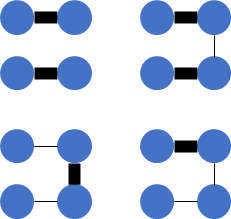

In [3]:
# c909: A-B = 9, B-C = 0, C-D = 9 = 2 clusters, each with 9 internal weight, 0 inter-connections
c909 = csr_matrix([[0,9,0,0],[9,0,0,0],[0,0,0,9],[0,0,9,0]])
c919 = csr_matrix([[0,9,0,0],[9,0,1,0],[0,1,0,9],[0,0,9,0]])
c191 = csr_matrix([[0,1,0,0],[1,0,9,0],[0,9,0,1],[0,0,1,0]])
c911 = csr_matrix([[0,9,0,0],[9,0,1,0],[0,1,0,1],[0,0,1,0]])

In [4]:
def fit(cls, **kwargs):
    algo = cls(**kwargs)
    for adjacency in [c909, c919, c191, c911]:
      print(algo.fit_transform(adjacency))

In [5]:
# Louvain seems to have a reasonable clustering approach
fit(sknetwork.clustering.Louvain)

[0 0 1 1]
[0 0 1 1]
[0 0 0 0]
[0 0 1 1]


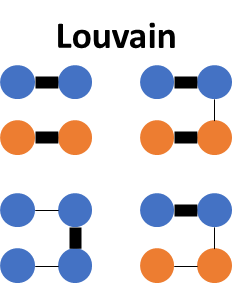

In [6]:
# Propagation connects everything together
fit(sknetwork.clustering.PropagationClustering)

[0 0 1 1]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]


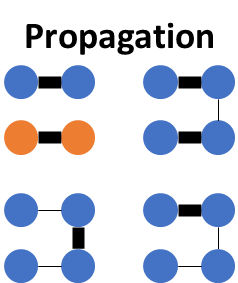

In [7]:
# KMeans makes no sense
fit(sknetwork.clustering.KMeans, n_clusters=2)

[0 0 1 1]
[1 1 0 0]
[1 1 0 0]
[1 0 0 1]


c:\Users\Anand S\.conda\envs\gramex\lib\site-packages\sknetwork\utils\check.py:288: Warning: The dimension of the embedding cannot exceed 2.Changed accordingly.
  "Changed accordingly.".format(n_min)))


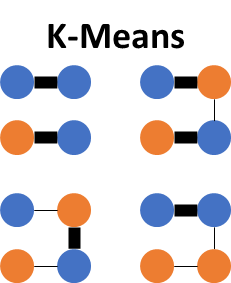

In [8]:
import sknetwork.hierarchy

In [9]:
# Strange that c191 does not connect 1-2 first, rest is OK
fit(sknetwork.hierarchy.Paris)

[[1.   0.   0.25 2.  ]
 [3.   2.   0.25 2.  ]
 [5.   4.    inf 4.  ]]
[[1.         0.         0.2631579  2.        ]
 [3.         2.         0.2631579  2.        ]
 [5.         4.         9.49999993 4.        ]]
[[1.         0.         0.45454544 2.        ]
 [3.         2.         0.45454544 2.        ]
 [5.         4.         0.61111112 4.        ]]
[[3.         2.         0.09090909 2.        ]
 [1.         0.         0.45454544 2.        ]
 [4.         5.         2.59090897 4.        ]]


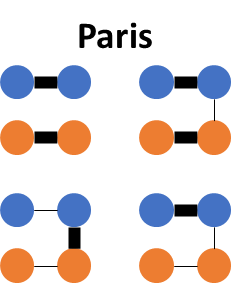

In [10]:
# Strange that c191 does not connect 1-2 first, rest is OK
fit(sknetwork.hierarchy.LouvainHierarchy)

[[1. 0. 0. 2.]
 [3. 2. 0. 2.]
 [5. 4. 1. 4.]]
[[1. 0. 0. 2.]
 [3. 2. 0. 2.]
 [5. 4. 1. 4.]]
[[3. 2. 0. 2.]
 [4. 1. 0. 3.]
 [5. 0. 0. 4.]]
[[1. 0. 0. 2.]
 [3. 2. 0. 2.]
 [5. 4. 1. 4.]]


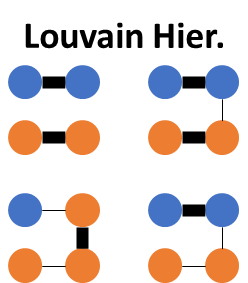

In [11]:
# Ward makes no sense
fit(sknetwork.hierarchy.Ward)

[[2.         3.         1.39734257 2.        ]
 [0.         1.         1.43013484 2.        ]
 [4.         5.         2.0004027  4.        ]]
[[0.         1.         1.41421356 2.        ]
 [2.         3.         1.41421356 2.        ]
 [4.         5.         2.         4.        ]]
[[0.         3.         1.41421356 2.        ]
 [1.         2.         1.41421356 2.        ]
 [4.         5.         2.         4.        ]]
[[0.         1.         1.41421356 2.        ]
 [2.         3.         1.41421356 2.        ]
 [4.         5.         2.         4.        ]]


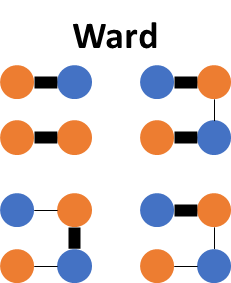

# Download IMDb Data

[IMDb Datasets](https://www.imdb.com/interfaces/) provide dumps of all movie data. We'll download 3 tables:

## name.basics.tsv.gz

**nconst**|**primaryName**|**birthYear**|**deathYear**|**primaryProfession**|**knownForTitles**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
nm0000001|Fred Astaire|1899|1987|soundtrack,actor,miscellaneous|tt0031983,tt0072308,tt0053137,tt0050419
nm0000002|Lauren Bacall|1924|2014|actress,soundtrack|tt0071877,tt0037382,tt0038355,tt0117057
nm0000003|Brigitte Bardot|1934|\N|actress,soundtrack,music\_department|tt0054452,tt0049189,tt0056404,tt0057345
nm0000004|John Belushi|1949|1982|actor,soundtrack,writer|tt0080455,tt0078723,tt0072562,tt0077975
nm0000005|Ingmar Bergman|1918|2007|writer,director,actor|tt0050976,tt0050986,tt0060827,tt0083922

## title.basics.tsv.gz

**tconst**|**titleType**|**primaryTitle**|**originalTitle**|**isAdult**|**startYear**|**endYear**|**runtimeMinutes**|**genres**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
tt0000001|short|Carmencita|Carmencita|0|1894|\N|1|Documentary,Short
tt0000002|short|Le clown et ses chiens|Le clown et ses chiens|0|1892|\N|5|Animation,Short
tt0000003|short|Pauvre Pierrot|Pauvre Pierrot|0|1892|\N|4|Animation,Comedy,Romance
tt0000004|short|Un bon bock|Un bon bock|0|1892|\N|12|Animation,Short
tt0000005|short|Blacksmith Scene|Blacksmith Scene|0|1893|\N|1|Comedy,Short

## title.principals.tsv.gz

**tconst**|**ordering**|**nconst**|**category**|**job**|**characters**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
tt0000001|1|nm1588970|self|\N|["Self"]
tt0000001|2|nm0005690|director|\N|\N
tt0000001|3|nm0374658|cinematographer|director of photography|\N
tt0000002|1|nm0721526|director|\N|\N
tt0000002|2|nm1335271|composer|\N|\N

In [12]:
# Download the data
# !rm -f *.tsv.gz
!curl --silent -C - -o name.basics.tsv.gz https://datasets.imdbws.com/name.basics.tsv.gz
!curl --silent -C - -o title.principals.tsv.gz https://datasets.imdbws.com/title.principals.tsv.gz
!curl --silent -C - -o title.basics.tsv.gz https://datasets.imdbws.com/title.basics.tsv.gz
!ls -la *.tsv.gz

-rwxrwxr-x+ 1 Anand S Anand S 229771318 Jul  1 08:32 name.basics.tsv.gz
-rwxrwxr-x+ 1 Anand S Anand S 157916340 Jul  1 08:32 title.basics.tsv.gz
-rwxrwxr-x+ 1 Anand S Anand S 402948527 Jul  1 08:32 title.principals.tsv.gz


In [13]:
# These gzip files have trailing garbage.
# Python's gzip module does not read GZIP files with trailing garbage.
# Let's create an equivalent of pandas.read_csv() that works around it.
# See https://stackoverflow.com/a/54608126/100904
import zlib
import io
import pandas as pd

def read_csv(path, **kwargs):
    with open(path, 'rb') as handle:
        raw = handle.read()
    stream = io.BytesIO(zlib.decompress(raw, zlib.MAX_WBITS|16))
    return pd.read_csv(stream, **kwargs)

In [14]:
# Load the movies. 1.4GB RAM. 15s
movies = read_csv('title.basics.tsv.gz', sep='\t', na_values='\\N', dtype={
    'tconst': 'str',
    'titleType': 'str',
    'primaryTitle': 'str',
    'startYear': 'Int64',
}, usecols=['tconst', 'titleType', 'primaryTitle', 'startYear']).set_index('tconst')

In [15]:
# Only consider movies, not TV series, etc. Shrinks data to ~5%
movies = movies[movies['titleType'] == 'movie']
del movies['titleType']
movies.head()

,primaryTitle,startYear
tconst,,
tt0000502,Bohemios,1905
tt0000574,The Story of the Kelly Gang,1906
tt0000591,The Prodigal Son,1907
tt0000615,Robbery Under Arms,1907
tt0000630,Hamlet,1908


In [16]:
# Load the cast of each film. 2.0 GB RAM. 30s
cast = read_csv('title.principals.tsv.gz', sep='\t', na_values='\\N', dtype={
    'tconst': 'str',
    'nconst': 'str',
    'category': 'str',
}, usecols=['tconst', 'nconst', 'category'])

In [17]:
# Only consider actors, not directors, composers, etc. Shrinks data to about 40%
# Only consider actors that have acted in movies, not TV series, etc.
cast = cast[cast.category.isin({'actor', 'actress'}) & cast['tconst'].isin(movies.index)]
cast.head()

,tconst,nconst,category
849,tt0000502,nm0215752,actor
850,tt0000502,nm0252720,actor
1041,tt0000574,nm0846887,actress
1042,tt0000574,nm0846894,actor
1043,tt0000574,nm1431224,actor


In [18]:
# Load 11m names with birth year. 16s
name = read_csv('name.basics.tsv.gz', sep='\t', na_values='\\N', dtype={
    'nconst': 'str',
    'primaryName': 'str',
    'birthYear': 'Int64'
}, usecols=['nconst', 'primaryName', 'birthYear']).set_index('nconst')

In [19]:
# Drop those who haven't acted in movies
name = name[name.index.isin(cast['nconst'])]
# name['titles'] has the number of movies they've acted in
name['titles'] = cast['nconst'].value_counts()
name.head()

,primaryName,birthYear,titles
nconst,,,
nm0000001,Fred Astaire,1899,35
nm0000002,Lauren Bacall,1924,37
nm0000003,Brigitte Bardot,1934,35
nm0000004,John Belushi,1949,7
nm0000005,Ingmar Bergman,1918,3


# Which actors act with each other most?

In [20]:
# First, we need to create an adjacency matrix of actors - movies
# Each row is an movie. Each column is an actor.
# Each cell has 1 if the actor acted in the movie.
# We'll use Pandas' category datatype to do this

p = cast.copy()
p['title'] = p['tconst'].astype('category')
p['name'] = p['nconst'].astype('category')

# Now, we can get a unique index for each title or movie.
# 'row' has the row number, and 'col' has the column number, of each
# cell that should be marked as 1
p['row'] = p['title'].cat.codes.values
p['col'] = p['name'].cat.codes.values
p.head()

,tconst,nconst,category,title,name,row,col
849,tt0000502,nm0215752,actor,tt0000502,nm0215752,0,44224
850,tt0000502,nm0252720,actor,tt0000502,nm0252720,0,50873
1041,tt0000574,nm0846887,actress,tt0000574,nm0846887,1,145829
1042,tt0000574,nm0846894,actor,tt0000574,nm0846894,1,145830
1043,tt0000574,nm1431224,actor,tt0000574,nm1431224,1,292890


In [21]:
# Now, let's create a sparse matrix out of this.
# Each row is a movie. Each column is an actor.
# If the actor acted in the movie, the cell has 1, else 0.
matrix = csr_matrix((np.ones(len(p), dtype='int'), (p['row'], p['col'])))
matrix[:10, 44200:44210].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [22]:
# 'matrix' is an "movie - actor" matrix.
# To convert this into an "actor - actor" matrix, we need to square it.
# Then, each row is an actor. Each column is an actor.
# The cell shows how many movies they acted together in.
square = matrix.T * matrix

# The diagonal has the number of movies a person has acted with themselves.
# Let's set that to zero.
square.setdiag(0)

# Here's what it looks like
square[:10, :10].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 4, 0, 0, 0, 1, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0]], dtype=int32)

In [23]:
# Let's create a DataFrame with the number of times 2 actors acted together
# The code is wrapped into the get_pairs() function below.

# (we'll get rid of the spare variables now)
del p, matrix, square

In [24]:
def get_pairs(min_acted=1, min_pairings=1):
    '''
    Returns an adjacency matrix and actor mapping of actor pairs where:
    - Each actor has acted in at least min_acted films
    - The two actors have acted together in at least min_pairings films
    '''
    top_actors = cast[cast['nconst'].isin(name.index[name['titles'] >= min_acted])]

    # First, we need to create an adjacency matrix of actors - movies
    # Each row is an movie. Each column is an actor.
    # Each cell has 1 if the actor acted in the movie.
    # We'll use Pandas' category datatype to do this
    p = top_actors.copy()
    p['title'] = p['tconst'].astype('category')
    p['name'] = p['nconst'].astype('category')

    # Now, we can get a unique index for each title or movie.
    # 'row' has the row number, and 'col' has the column number, of each
    # cell that should be marked as 1
    p['row'] = p['title'].cat.codes.values
    p['col'] = p['name'].cat.codes.values

    # Now, let's create a sparse matrix out of this.
    # Each row is a movie. Each column is an actor.
    # If the actor acted in the movie, the cell has 1, else 0.
    matrix = csr_matrix((np.ones(len(p), dtype='int'), (p['row'], p['col'])))

    # 'matrix' is an "movie - actor" matrix.
    # To convert this into an "actor - actor" matrix, we need to square it.
    # Then, each row is an actor. Each column is an actor.
    # The cell shows how many movies they acted together in.
    square = matrix.T * matrix

    # The diagonal has the number of movies a person has acted with themselves.
    # Let's set that to zero.
    square.setdiag(0)

    # Let's create a DataFrame with the number of times 2 actors acted together
    cat = name.reindex(p['name'].cat.categories)
    square = square.tocoo()
    pairs = pd.DataFrame({
        'row': cat.index[square.row],
        'col': cat.index[square.col],
        'n': square.data
    })
    pairs = pairs[pairs.n >= min_pairings].reset_index(drop=True)
    return pairs.sort_values('n', ascending=False)

In [25]:
# See which pairs of actors have acted most together.
pairings = get_pairs()
pairings

,row,col,n
198884,nm0046850,nm0006982,192
381052,nm0006982,nm0046850,192
4308784,nm0648803,nm2082516,146
2192882,nm2082516,nm0648803,146
1506508,nm0006982,nm0419653,127
...,...,...,...
2254877,nm0042524,nm0669669,1
2254876,nm0879129,nm0669669,1
2254875,nm0949646,nm0669669,1
2254874,nm0433209,nm0669660,1


In [26]:
# The IMDb IDs are not that intuitive.
# Let's print the names to make it more meaningful
def lookup(pairs):
    return pd.concat([
        pairs.reset_index(drop=True),
        name.loc[pairs.row].reset_index(drop=True),
        name.loc[pairs.col].reset_index(drop=True),
    ], axis=1).drop(columns=['row', 'col'])

In [27]:
lookup(pairings)

,n,primaryName,birthYear,titles,primaryName,birthYear,titles
0,192,Bahadur,<NA>,413,Adoor Bhasi,1929,563
1,192,Adoor Bhasi,1929,563,Bahadur,<NA>,413
2,146,Matsunosuke Onoe,1875,563,Kijaku Ôtani,1878,163
3,146,Kijaku Ôtani,1878,163,Matsunosuke Onoe,1875,563
4,127,Adoor Bhasi,1929,563,Jayabharati,<NA>,266
...,...,...,...,...,...,...,...
6359713,1,Steve Austin,1964,10,J. Eddie Peck,1958,6
6359714,1,Tyrus,1980,2,J. Eddie Peck,1958,6
6359715,1,Jacob Young,1979,7,J. Eddie Peck,1958,6
6359716,1,Barry Sattels,1946,4,George Peck,<NA>,1


These two Indian Malayalam actors [Adoor Bhasi](https://www.imdb.com/name/nm0006982/) and [Bahadur](https://www.imdb.com/name/nm0046850/) appeared together in almost 200 films.

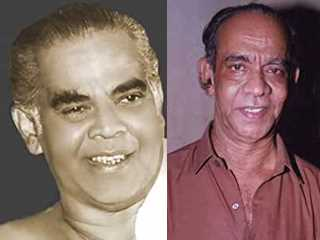

Japanese actors [Kijaku Ôtani](https://www.imdb.com/name/nm2082516/) and [Matsunosuke Onoe](https://www.imdb.com/name/nm0648803/) acted together in 146 films.

# Name clusters based on actors

Once we create clusters, we need to label them. One way is to label *famous actors* with a cluster

- E.g. Label any cluster with Brad Pitt as American.

However, some actors work across clusters, and the algorithm might place them in either cluster.

- E.g. Ingrid Bergman acts in Swedish and American films.
- E.g. Javier Bardem acts in Spanish and American films.

Also, we will want to create sub-clusters under a cluster. An actor might belong to both.

- E.g. Brahmanandam is in the "Telugu" sub-cluster under the "South Indian" cluster.
- E.g. Anup Kumar is in the "Bengali" sub-cluster under the "North Indian" cluster.

We'll tag the most popular actors. A cluster with that actor is named by the actor's tag.

- If there are multiple tags, e.g. British actors in an American cluster, we'll name by majority

In [28]:
# Let's tag actors based on known data points
def tag_actors(**kwargs):
    result = []
    for name, tags in kwargs.items():
        for tag in tags.split(','):
            result.append([name, tag.strip().title()])
    return pd.DataFrame(result, columns=['primaryName', 'tag'])

actor_tags = tag_actors(**{
    'Aachi Manorama': 'Indian, South Indian, Tamil',
    'Aamir Khan': 'Indian, North Indian, Hindi',
    'Adel Emam': 'Egyptian',
    'Ajab Gul': 'Pakistani',
    'Alekos Alexandrakis': 'Greek',
    'Alon Aboutboul': 'Israeli',
    'Ansa Ikonen': 'Finnish, Old',
    'Amitabh Bachchan': 'Indian, North Indian, Hindi',
    'Amr Waked': 'Egyptian',
    'Anjali Devi': 'Indian, South Indian, Telugu, Old',
    'Anny Ondra': 'Czech, Old',
    'Antal Páger': 'Hungarian',
    'Antonio Banderas': 'Spanish, American',
    'Anup Kumar': 'Indian, North Indian, Bengali',
    'Anwar Hossain': 'Bangladeshi, Old',
    'Arifin Shuvo': 'Bangladeshi',
    'Badar Munir': 'Pakistani',
    'Bijay Mohanty': 'Indian, North Indian, Odia',
    'Brad Pitt': 'American',
    'Brahmanandam': 'Indian, South Indian, Telugu',
    'Bourvil': 'French, Old',
    'Burak Özçivit': 'Turkish',
    'Cary Grant': 'American, Old',
    'Charles Chaplin': 'British, Old',
    'Christian Bale': 'British',
    'Christoph Waltz': 'German',
    'Coco Martin': 'Filipino',
    'Daniel Brühl': 'German',
    'Danish Taimoor': 'Pakistani',
    'Delhi Ganesh': 'Indian, South Indian, Tamil',
    'Dinesh Lal Yadav': 'Indian, North Indian, Bhojpuri',
    'Durga Khote': 'Indian, North Indian, Hindi, Old',
    'Edvin Adolphson': 'Swedish, Old',
    'Eugenio Derbez': 'Mexican',
    'Ferdous Ahmed': 'Bangladeshi',
    'Fernanda Montenegro': 'Brazilian',
    'Fernandel': 'French, Old',
    'Frederik Jacobsen': 'Danish, Old',
    'Fritz Kampers': 'German, Old',
    'George Stover': 'Hollywood Horror',
    'Greta Garbo': 'Swedish, American, Old',
    'Hyun Bin': 'South Korean',
    'Ian McKellen': 'British',
    'Ingrid Bergman': 'Swedish, American, Old',
    'Jackson Anthony': 'Sri Lankan',
    'Janusz Gajos': 'Polish',
    'Javier Bardem': 'Spanish, American',
    'Jean Dujardin': 'French',
    'Jerzy Stuhr': 'Polish',
    'Joe DeBartolo': 'Hollywood Horror',
    'John Wayne': 'American, Old',
    'Johnny Walker': 'Indian, North Indian, Hindi, Old',
    'Jürgen Prochnow': 'German',
    'Kabori Sarwar': 'Bangladeshi, Old',
    'Kamal Addaraarachchi': 'Sri Lankan',
    'Katherine Hepburn': 'American, Old',
    'Kento Yamazaki': 'Japanese',
    'Kivanç Tatlitug': 'Turkish',
    'Labros Konstadaras': 'Greek',
    'Lionel Barrymore': 'American, Old',
    'M.G. Ramachandran': 'Indian, South Indian, Tamil, Old',
    'Mahira Khan': 'Pakistani',
    'Mammootty': 'Indian, South Indian, Malayalam',
    'Marcello Mastroianni': 'Italian',
    'Mari Töröcsik': 'Hungarian',
    'Mario Casas': 'Spanish',
    'Mario Maurer': 'Thai',
    'Marki Henderson': 'Hollywood - TV Series',
    'Marwan Kenzari': 'Dutch',
    'Masayoshi Nogami': 'Japanese Porno',
    'Maulik Nayak': 'Indian, Northi Indian, Gujarati',
    'Michael Caine': 'British',
    'Mihir Das': 'Indian, North Indian, Odia',
    'Milena Dravic': 'Yugoslavian',
    'Mohanlal': 'Indian, South Indian, Malayalam',
    'N.T. Rama Rao': 'Indian, South Indian, Telugu, Old',
    'Nagesh': 'Indian, South Indian, Tamil, Old',
    'Nicholas Saputra': 'Indonesian',
    'Odunlade Adekola': 'Nigerian',
    'Olga Engl': 'German, Old',
    'P. Anthony Perea': 'Hollywood - TV Series',
    'Parviz Parastui': 'Iranian',
    'Paul Hörbiger': 'German, Old',
    'Paul T.T. Easter': 'British',
    'Pedro Almodóvar': 'Spanish',
    'Philip Bech': 'Danish, Old',
    'Raghveer Boli': 'Indian, North Indian, Punjabi',
    'Rangeela': 'Pakistani, Old',
    'Reza Rahadian': 'Indonesian',
    'Roberto Benigni': 'Italian',
    'Rodrigo Santoro': 'Brazilian',
    'Ron Jeremy': 'Hollywood Porno',
    'Roni Jonah': 'Hollywood Horror',
    'Sanjay Pandey': 'Indian, North Indian, Bhojpuri',
    'Seiji Nakamitsu': 'Japanese Porno',
    'Senthil': 'Indian, South Indian, Tamil',
    'Shah Rukh Khan': 'Indian, North Indian, Hindi',
    'Shahab Hosseini': 'Iranian',
    'Shivaji Ganesan': 'Indian, South Indian, Tamil, Old',
    'Shivarajkumar': 'Indian, South Indian, Kannada',
    'Siddharth Randeria': 'Indian, North Indian, Gujarati',
    'Soumitra Chatterjee': 'Indian, North Indian, Bengali',
    'Sultan Rahi': 'Pakistani, Old',
    'Swaylee Loughnane': 'British',
    'Takeru Satoh': 'Japanese',
    'Tauno Palo': 'Finnish, Old',
    'Theodor Pistek': 'Czech, Old',
    'Tom Byron': 'Hollywood Porno',
    'Tom Hanks': 'American',
    'Tony Lee Gratz': 'Hollywood Horror',
    'Toyin Abraham': 'Nigerian',
    'Velimir \'Bata\' Zivojinovic': 'Yugoslavian',
    'Vijay Chavan': 'Indian, North Indian, Marathi',
    'Vincent Cassel': 'French',
    'Vladimir Mashkov': 'Russian',
    'Wagner Moura': 'Brazilian',
    'Will Smith': 'American',
    'Xian Li': 'Chinese',
    'Yang Yang': 'Chinese',
    'Yibo Wang': 'Chinese',
    'Yograj Singh': 'Indian, North Indian, Punjabi',
    'Yuri Kolokolnikov': 'Russian',
    'Zhan Xiao': 'Chinese',
})
actor_tags.head()

,primaryName,tag
0,Aachi Manorama,Indian
1,Aachi Manorama,South Indian
2,Aachi Manorama,Tamil
3,Aamir Khan,Indian
4,Aamir Khan,North Indian


# Create utilities to cluster actors

In [29]:
# Store all clusters, subclusters, models & submodels here
subclusters, models, metrics = {}, {}, {}

In [38]:
def _cluster(pairs, **kwargs):
    '''
    Raw clustering function for internal use.
    '''
    # CREATE THE CLUSTERS
    # -------------------
    # Create a copy of the pairs dataset -- we will change it
    pairs = pairs.copy().reset_index(drop=True)
    # Convert IMDb IDs into sequential numbers for clustering
    uniq = pairs.row.unique()
    cat = pd.Series(np.arange(len(uniq)), index=uniq)
    # Create the adjacency matrix
    adjacency = sknetwork.data.from_edge_list(pd.DataFrame({
        'row': cat[pairs.row].reset_index(drop=True),
        'col': cat[pairs.col].reset_index(drop=True),
        'n': pairs['n'],
    }).values)
    
    # Cluster network using Louvain
    model = sknetwork.clustering.Louvain(random_state=1, **kwargs)
    labels = model.fit_transform(adjacency)
    metrics = sknetwork.clustering.modularity(adjacency, labels, return_all=True)
    # cluster is the output DataFrame. Start with the "name" DataFrame copy.
    # It already has nconst (index), primaryName, birthYear, titles
    cluster = name.loc[cat.index].copy()
    # Add the "cluster" column -- which cluster do they belong to
    cluster['cluster'] = pd.Series(labels, index=cat.index)

    # NAME THE CLUSTERS
    # -----------------
    # Show all tags at least 10% of actors have.
    # If 50% of actors have a tag, capitalize it.
    def top_tags(group, min=0.1, caps=0.5):
        freq = group['tag'].value_counts() / group['primaryName'].nunique()
        tags = []
        # TODO: Sort and pick the most specific tag, i.e. last in the hierarchy
        for tag_name, tag_freq in freq.sort_values(ascending=False).items():
            if tag_freq < min:
                break
            tags.append(tag_name.upper() if tag_freq > caps else tag_name)
        return ', '.join(tags)

    # Ignore any actor without a birth year. It's a crude way of de-duplicating for the merge
    # For each actor with a tag, merge on the cluster to get all tags
    join = actor_tags.merge(cluster, on='primaryName')
    # The name of the cluster is the top tags of the people in the cluster
    cluster_names = join.groupby('cluster').apply(top_tags)
    # Add the "clusterName" column by replacing cluster ID from "cluster" column
    cluster['clusterName'] = cluster['cluster'].replace(cluster_names) if len(cluster_names) else cluster['cluster']

    # ADD CLUSTER METRICS
    # -------------------
    # Explore pairings across clusters
    pairs['rowcluster'] = cluster.loc[pairs.row].cluster.reset_index(drop=True)
    pairs['colcluster'] = cluster.loc[pairs.col].cluster.reset_index(drop=True)
    pairs['incluster'] = pairs['n']
    pairs['incluster'] = pairs['n']
    pairs['incluster'].where(pairs['rowcluster'] == pairs['colcluster'], 0, inplace=True)
    groups = pairs.groupby('row')
    # costars: number of unique costars they've acted with
    cluster['costars'] = groups['col'].nunique()
    # coclusters: how many clusters do their costars belong to
    cluster['coclusters'] = groups['colcluster'].nunique()
    # pairings: how many co-starrings (actor-film combinations)
    cluster['pairings'] = groups['n'].sum()
    # incluster: % of pairings with actor in same cluster
    cluster['incluster'] = groups['incluster'].sum()
    cluster['incluster%'] = cluster['incluster'] / cluster['pairings']
    return cluster, model, metrics

In [31]:
# _path('Brad Pitt', 'Nicolas Cage') returns the path to cluster
# (Brad Pitt's cluster, Nicolas Cage's cluster within Brad Pitt's cluster)
# All of the below are identical
# _path(0, 0)
# _path('Brad Pitt', 0)
# _path(0, 'Nicolas Cage')
# _path('Brad Pitt', 'Nicolas Cage')
def _path(*actors):
    path = []
    for index in range(len(actors)):
        cluster = subcluster(*path[:index])
        id = get_actor(actors[index], *path[:index]).cluster if type(actors[index]) is str else actors[index]
        path.append(id)
    return tuple(path)

In [32]:
def subcluster(*path):
    '''
    For a cluster path, returns clustered dataset with cluster labels, & more.

    - subcluster[()] returns the root cluster.
    - subcluster[(3, )] subclusters the root cluster and returns cluster #3
    - subcluster[(3, 4)] returns cluster #4 under cluster #3, etc.

    Clusters are cached.
    '''
    path = _path(*path)
    if path in subclusters:
        return subclusters[path]
    # Return root cluster
    if len(path) == 0:
        subclusters[path], models[path], metrics[path] = _cluster(pairings)
        return subclusters[path]
    # Create parent cluster if required
    if path[:-1] not in subclusters:
        subcluster(path[:-1])
    # Create current subcluster
    parent, index = subclusters[path[:-1]], path[-1]
    indices = parent[parent['cluster'] == index].index
    subset = pairings[pairings.row.isin(indices) & pairings.col.isin(indices)]
    subclusters[path], models[path], metrics[path] = _cluster(subset)
    return subclusters[path]

# Find each actor's cluster

`subcluster()` clusters all actors and returns a DataFrame of each actor's cluster. It reports:

- `nconst` (index): IMDb ID of the actor. https://www.imdb.com/name/<nconst>/ points to actor
- `primaryName`: Name of the actor
- `birthYear`: Year of birth, if available
- `titles`: Number of movies (titles) the actor has acted in
- `cluster`: Cluster ID the actor belongs to
- `clusterName`: Name(s) of the cluster ID based on most popular actor_tags
- `costars`: How many other unique actors do they act with?
- `coclusters`: How many other clusters do they act with?
- `pairings`: How many co-starrings (pairings) have do the have?
- `incluster`: How many of these pairings are within their cluster?
- `incluster`%: % of pairings within their cluster (incluster / pairings)

In [39]:
subcluster()

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0046850,Bahadur,<NA>,413,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",283,2,1654,1651,0.998186
nm0006982,Adoor Bhasi,1929,563,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",309,3,2288,2277,0.995192
nm0648803,Matsunosuke Onoe,1875,563,7,JAPANESE,95,1,1110,1110,1.000000
nm2082516,Kijaku Ôtani,1878,163,7,JAPANESE,92,1,945,945,1.000000
nm0419653,Jayabharati,<NA>,266,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",243,3,1114,1112,0.998205
...,...,...,...,...,...,...,...,...,...,...
nm2701431,Tertta Saarikko,<NA>,1,32,"FINNISH, OLD",1,1,1,1,1.000000
nm0098159,Bernard Bossick,1924,1,12,HOLLYWOOD PORNO,1,1,1,1,1.000000
nm4136694,Matthew Superfisky,<NA>,1,228,228,1,1,1,1,1.000000
nm0289873,Laura Frances,<NA>,1,29873,29873,1,1,1,1,1.000000


# Create utilities to explore clusters

In [40]:
def list_(method, *path, count=30, **kwargs):
    '''Base method to list cluster information'''
    path = _path(*path)
    cluster = subcluster(*path)
    top_clusters = cluster['clusterName'].value_counts()
    groups = {k: v for k, v in cluster.groupby('clusterName')}
    for clusterName, count in top_clusters.head(count).iteritems():
        group = groups[clusterName]
        print(f'{group["cluster"].iloc[0]} {clusterName} ({count:,d} actors):',
              method(group=group, **kwargs))

def list_clusters(*path, count=30, names=10):
    '''Returns a list of clusters with the total actors and the top actors by title'''
    path = _path(*path)
    top_actors = lambda group, names: ', '.join(group.sort_values('titles', ascending=False).head(names)['primaryName'].values)
    return list_(top_actors, *path, count=count, names=names)

In [41]:
list_clusters(count=5, names=5)

0 American, British, German, Spanish, French (84,220 actors): Eric Roberts, Gérard Depardieu, Michael Madsen, Tom Sizemore, Danny Trejo
1 HOLLYWOOD HORROR, Hollywood - Tv Series (31,708 actors): Tony Devon, Debbie Rochon, Shawn C. Phillips, Lloyd Kaufman, Brinke Stevens
2 Italian, Spanish (24,778 actors): Fernando Fernán Gómez, José Luis López Vázquez, Francisco Rabal, Franco Nero, Vittorio De Sica
3 OLD, AMERICAN, Swedish, British (23,476 actors): Raymond Hatton, Charles Starrett, Johnny Mack Brown, Jack Holt, Noah Beery
4 GERMAN, OLD (20,492 actors): Olga Engl, Paul Hörbiger, Fritz Kampers, Wilhelm Diegelmann, Georg Alexander


In [42]:
def get_metrics(*path):
    '''Returns modularity, fit, diversity of a cluster'''
    path = _path(*path)
    subcluster(*path)
    m = metrics[path]
    print(f'Modularity: {m[0]:.1%}. Fit: {m[1]:.1%}. Diversity: {m[2]:.1%}')

In [43]:
# Modularity = % links within cluster vs if actors paired randomly.
# Fit = % links within cluster
# Diversity = % of random pairings
# Modularity = Fit - Diversity
get_metrics()

Modularity: 90.7%. Fit: 94.8%. Diversity: 4.1%


In [44]:
def get_actor(actor_name, *path):
    '''Get all information about an actor in a cluster'''
    path = _path(*path)
    cluster = subcluster(*path)
    return cluster[cluster['primaryName'] == actor_name].iloc[0]

In [45]:
get_actor('Jackie Chan')

primaryName    Jackie Chan
birthYear             1954
titles                  91
cluster                  5
clusterName        CHINESE
costars                228
coclusters               9
pairings               276
incluster              204
incluster%         0.73913
Name: nm0000329, dtype: object

# Worldwide actor clusters

Let's list the top clusters of actors (by number of actors) world-wide, and the most prolific actors within each.

In [46]:
# Here are top 30 worldwide clusters with the 10 actors with most titles
list_clusters(count=30, names=10)

0 American, British, German, Spanish, French (84,220 actors): Eric Roberts, Gérard Depardieu, Michael Madsen, Tom Sizemore, Danny Trejo, Joe Estevez, Michel Piccoli, John Savage, Vernon Wells, Catherine Deneuve
1 HOLLYWOOD HORROR, Hollywood - Tv Series (31,708 actors): Tony Devon, Debbie Rochon, Shawn C. Phillips, Lloyd Kaufman, Brinke Stevens, Felissa Rose, Maria Olsen, Natalie Peri, Dawna Lee Heising, Lynn Lowry
2 Italian, Spanish (24,778 actors): Fernando Fernán Gómez, José Luis López Vázquez, Francisco Rabal, Franco Nero, Vittorio De Sica, Marcello Mastroianni, Ugo Tognazzi, Fernando Rey, Alberto Sordi, Amedeo Nazzari
3 OLD, AMERICAN, Swedish, British (23,476 actors): Raymond Hatton, Charles Starrett, Johnny Mack Brown, Jack Holt, Noah Beery, Buck Jones, Bob Steele, John Wayne, Lewis Stone, Lionel Barrymore
4 GERMAN, OLD (20,492 actors): Olga Engl, Paul Hörbiger, Fritz Kampers, Wilhelm Diegelmann, Georg Alexander, Erich Kaiser-Titz, Harry Liedtke, Hans Albers, Frida Richard, Theodo

# Other collaboration networks

Collaboration (or bipartite) networks are were two kinds of things are connected -- e.g. actors and movies.

The techniques in this notebook apply to *any* bipartite network, like these:

- Product - Buyer networks.
  - Cluster Products based on how often they're bought together. Recommend similar products
  - Cluster Buyers based on how often they buy the same product. Market similarly to buyers
  - Note: this applies to bids on auctions too
- Company - Director networks.
  - Cluster Companies based on common directors. Find which other companies to investigate for fraud
  - Cluster Directors based on common companies. Find other directors you can invite to a board
- Person - Payment networks.
  - Cluster People based on how often they pay each other. Find other fraudsters and money launderers
- Person - Email networks.
  - Cluster People based on how often they mail each other. Find socialites, outliers and connectors
  - Cluster Emails based on common people. Recommend emails to forward
- Person - Calendar Invite networks
  - Cluster People based on how often they attend meetings together. Find emerging teams
  - Cluster Invites based on common people. Recommend invites to forward
- Person - Group networks (e.g. mailing lists, WhatsApp groups, Facebook groups)
  - Cluster People based on how often they're in the same group. Find new friends
  - Cluster Groups based on how often they have the same people. Recommend new groups to join
- Company - Patent - Author networks
  - Cluster Companies based on similar patents. Find competitors to buy out
  - Cluster Authors based on similar patents. Find people to hire
  - Cluster Patents based on similar companies. Find what you're competitors are up to
- Author - Paper networks
  - Cluster authors based on papers co-authored. Find research groups and hubs to tap into
  - Cluster papers based on co-authors. Find related interests of a research group
  - Note: this applies to [Citations](https://web.archive.org/web/20190522043016/http://www3.cs.stonybrook.edu/~leman/data/gscholar.db) too
- [Senator - Bill networks](https://www.senate.gov/legislative/votes_new.htm)
  - Cluster Senators who voted the same way on bills. Find Democrats who vote like Republicans
  - Cluster Bills based on who voted for them. Find Bills most amenable to the opposition
- Person - Topic networks
  - Cluster People based on how often they tag a topic (e.g. Python) on [StackOverflow](http://snap.stanford.edu/data/index.html). Find programming experts
  - Cluster Topics based on how often they're tagged by the same person. Find related areas of expertise and learning
  - Note: this applies to Github repositories and [Wikipedia pages](http://snap.stanford.edu/data/index.html) too
- [IAS Officers](https://tcpd.ashoka.edu.in/bureaucrats-of-india/) of the same batch, cadre, and state vs centre reporting
- Jazz musicians in the same band
- Sports collaborations (e.g. Football passing)
- Contact tracing (e.g. Person - Place/Time)
- Twitter mentions
- Survey data
- Cyber-risk threats
- ... and many more

Pick one example above. As you read further, think about how it would help your example.

# Which are the most insular / liberal clusters?

For every cluster, let's look at the % of co-stars *within the same cluster*.

- A high number (e.g. 99%) indicates INSULAR clusters. These actors act with outsiders only 1% of the time.
- A relatively low number (e.g. 90%) indicates LIBERAL clusters. These actors act with outsiders 10% of the time.

We list the top actor clusters below, how insular they are, and which other clusters they act with.

In [47]:
def list_collaborations(*path, count=30, names=10):
    path = _path(*path)
    # Which clusters do clusters collaborate with?
    if path not in models:
        subcluster(*path)
    cluster, model = subclusters[path], models[path]
    stats = cluster.groupby('cluster').agg({'clusterName': 'first', 'primaryName': 'count'})
    # For the top count clusters
    for index in range(count):
        # model.aggregate_ is a matrix that has the number of collaborations between 2 clusters
        # Get the count of pairings of this clusteer with other clusters
        inter = pd.DataFrame(model.aggregate_[index].todense()).iloc[0]
        # There are "total" pairings in this cluster
        total = inter.sum()
        print(index, stats['clusterName'][index], stats['primaryName'][index], 'actors', end=': ')
        # Sort the clusters by pairings (The first will always be this cluster, since every cluster acts with itself most)
        for pair, count in inter.sort_values(ascending=False).head(names).iteritems():
            # Print cluster name and % of pairings with that cluster
            print(stats['clusterName'][pair] if pair != index else '', f'({count / total:.1%})', end='. ')
        print('')

list_collaborations()

0 American, British, German, Spanish, French 84220 actors:  (89.0%). HOLLYWOOD HORROR, Hollywood - Tv Series (1.7%). OLD, AMERICAN, Swedish, British (1.5%). Italian, Spanish (1.2%). GERMAN, OLD (0.5%). BRITISH (0.5%). FRENCH, OLD (0.5%). MEXICAN (0.3%). OLD, DANISH, Swedish (0.2%). CHINESE (0.2%). 
1 HOLLYWOOD HORROR, Hollywood - Tv Series 31708 actors:  (90.4%). American, British, German, Spanish, French (5.6%). BRITISH (0.2%). 36 (0.2%). HOLLYWOOD - TV SERIES (0.1%). 45 (0.1%). MEXICAN (0.1%). Italian, Spanish (0.1%). 48 (0.1%). HOLLYWOOD PORNO (0.1%). 
2 Italian, Spanish 24778 actors:  (89.4%). American, British, German, Spanish, French (3.0%). OLD, AMERICAN, Swedish, British (1.5%). GERMAN, OLD (1.2%). FRENCH, OLD (1.1%). MEXICAN (1.1%). 15 (0.8%). HOLLYWOOD PORNO (0.4%). BRAZILIAN (0.2%). YUGOSLAVIAN (0.1%). 
3 OLD, AMERICAN, Swedish, British 23476 actors:  (95.3%). American, British, German, Spanish, French (2.0%). Italian, Spanish (0.8%). GERMAN, OLD (0.7%). FRENCH, OLD (0.4%). 

# How do clusters themselves cluster?

Used for blog post: [How isolated is Bollywood from World Cinema](https://www.s-anand.net/blog/how-isolated-is-bollywood-from-world-cinema/).

TODO: Convert this automatically into `cluster_collaboration.json`.

In [48]:
def list_collaboration_matrix(*path, count=30):
    path = _path(*path)
    # Which clusters do clusters collaborate with?
    if path not in models:
        subcluster(*path)
    model = models[path]
    # model.aggregate is a matrix that has the number of collaborations between 2 clusters
    interrelation = model.aggregate_[:count]
    return pd.DataFrame((interrelation / interrelation.sum(axis=1))[:count, :count])

list_collaboration_matrix(count=10)

,0,1,2,3,4,5,6,7,8,9
0,0.890154,0.017063,0.011658,0.015113,0.004888,0.002038,0.001308,0.001720,0.001364,0.002740
1,0.056325,0.904438,0.000864,0.000616,0.000540,0.000672,0.000472,0.000636,0.000180,0.000968
2,0.029972,0.000673,0.894494,0.015340,0.011805,0.000526,0.000199,0.000311,0.000576,0.010668
3,0.019943,0.000246,0.007873,0.952510,0.006684,0.000117,0.000086,0.000571,0.000106,0.001811
4,0.013786,0.000461,0.012949,0.014284,0.925708,0.000236,0.000109,0.000287,0.001838,0.000355
5,0.004877,0.000487,0.000490,0.000212,0.000200,0.981973,0.000128,0.003106,0.000081,0.000061
6,0.002457,0.000268,0.000146,0.000123,0.000073,0.000100,0.960280,0.000025,0.000064,0.000057
7,0.003414,0.000382,0.000240,0.000858,0.000202,0.002575,0.000026,0.973836,0.000091,0.000082
8,0.006642,0.000265,0.001091,0.000389,0.003173,0.000165,0.000165,0.000224,0.977043,0.000195
9,0.010697,0.001144,0.016196,0.005358,0.000492,0.000099,0.000118,0.000161,0.000156,0.953383


# Top costars of actors

In [49]:
def list_costars(actor, *path, names=10, id=False, min_costar=1):
    path = _path(*path)
    cluster = subcluster(*path)
    actor_id = name[name['primaryName'] == actor].index[0]
    titles = pairings[pairings['row'] == actor_id]
    costars = cluster.loc[titles['col']].copy()
    costars['n'] = titles.set_index('col')['n']
    cluster_names = cluster.groupby('cluster')['clusterName'].first()
    for cluster_index, count in costars.groupby('cluster')['n'].sum().sort_values(ascending=False).iteritems():
        cocluster = costars[costars['cluster'] == cluster_index].sort_values('n', ascending=False)
        cocluster = cocluster[cocluster['n'] >= min_costar]
        label = cluster_names[cluster_index]
        if id:
            print(f'{label} ({int(count)}):', ', '.join([f'{row.primaryName} ({row.name} {row.n})' for index, row in cocluster[:names].iterrows()]))
        else:
            print(f'{label} ({int(count)}):', ', '.join([f'{row.primaryName} ({row.n})' for index, row in cocluster[:names].iterrows()]))

In [50]:
# Which cluster do popular actors' costars belong to?
list_costars('Will Smith', names=10)

American, British, German, Spanish, French (93): Martin Lawrence (4), Tommy Lee Jones (3), Jaden Smith (2), Margot Robbie (2), Joel Edgerton (2), Charlize Theron (2), Jon Voight (2), Jamie Foxx (1), David Morse (1), Edward Norton (1)
HOLLYWOOD HORROR, Hollywood - Tv Series (3): Ryan Castle (1), Lex Elle (1), Derrick Gilbert (1)
Italian, Spanish (1): Jordi Mollà (1)
EGYPTIAN (1): Mena Massoud (1)


In [51]:
# Robin Williams never acted with any actor thrice. Acted twice only with 2 actors
list_costars('Robin Williams', names=10)

American, British, German, Spanish, French (125): Pamela Reed (2), Elijah Wood (2), Holly Palance (1), Bob Odenkirk (1), Julie Kavner (1), Laura Linney (1), John Lithgow (1), Nathan Lane (1), Marcia Gay Harden (1), Seth Green (1)
OLD, AMERICAN, Swedish, British (5): Peter O'Toole (1), Walter Matthau (1), Ray Walston (1), Dick Van Dyke (1), Ruth Nelson (1)
HUNGARIAN (2): Éva Igó (1), Pink (1)
THAI (2): Tom. T. Tran (1), Chintara Sukapatana (1)
MEXICAN (1): Roberto Aguire (1)
OLD, DANISH, Swedish (1): Max von Sydow (1)
15 (1): Alejandro Rey (1)
615 (1): JoJo (1)


In [52]:
# TODO: Why is Lev Gorn not here?
list_costars('Kamal Haasan')

INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Malayalam (764): Sridevi (23), Sripriya (20), Aachi Manorama (19), Y.G. Mahendran (14), Jayachitra (14), Jayasudha (12), Rajinikanth (12), Madhavi (11), Thengai Srinivasan (11), Jaishankar (11)
INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bhojpuri, Gujarati, Punjabi, Marathi (87): Rati Agnihotri (5), Manisha Koirala (4), Hema Malini (3), Poonam Dhillon (3), Om Puri (2), Amitabh Bachchan (2), Pooja Kumar (2), Amrish Puri (2), Urmila Matondkar (2), Reena Roy (2)
American, British, German, Spanish, French (1): Miles Anderson (1)
GERMAN, OLD (1): B.J. Britt (1)
BRITISH (1): Sunil Thapa (1)
PAKISTANI, INDIAN, NORTH INDIAN, ODIA, Old, Bangladeshi (1): Bindiya (1)


In [53]:
list_costars('Sophia Loren')

Italian, Spanish (83): Marcello Mastroianni (11), Vittorio De Sica (6), Raf Vallone (3), Alberto Sordi (2), Aldo Giuffrè (2), Franca Tamantini (1), Paul Muller (1), Marietto (1), Umberto Melnati (1), Jacques Stany (1)
OLD, AMERICAN, Swedish, British (70): Anthony Quinn (3), Trevor Howard (2), O.J. Simpson (2), Cary Grant (2), Anthony Perkins (2), John Huston (1), Steve Forrest (1), Peter Finch (1), George Kennedy (1), Angela Lansbury (1)
American, British, German, Spanish, French (18): John Vernon (2), Tippi Hedren (1), Philippe Noiret (1), Steve Railsback (1), Georges Wilson (1), Françoise Berd (1), Jean-Pierre Cassel (1), Muriel Catalá (1), Julia Roberts (1), F. Murray Abraham (1)
FRENCH, OLD (13): Jean Gabin (1), Marcel Dalio (1), Roger Hanin (1), Léa Gray (1), Robert Hossein (1), Jean-Pierre Aumont (1), Julien Bertheau (1), Lise Bourdin (1), Henri Vidal (1), Renaud Mary (1)
GERMAN, OLD (4): Mario Adorf (1), Romy Schneider (1), Maximilian Schell (1), Marianne Sägebrecht (1)
RUSSIAN 

# Crossover actors

We know that film actors mostly act within their own industry.

- Hollywood actors act with Hollywood actors 90% of the time.
- Chinese actors act with Chinese actors 99% of the time.

If a Hollywood producer wanted to cast a Chinese actor, whom could they pick?

Particularly if they wanted to reach out through their network of co-actors to find one?

In [54]:
# Who are the big crossover actors from each cluster? Who act across multiple clusters?
def list_crossovers(*path, count=30, names=10, min_titles=30):
    path = _path(*path)
    def _crossovers(group):
        top_crossover = group[group['titles'] > min_titles].sort_values('incluster%').head(names)
        return ', '.join(f'{row.primaryName} ({row["incluster%"]:.0%})' for index, row in top_crossover.iterrows())
    return list_(_crossovers, *path, count=count)

list_crossovers()

0 American, British, German, Spanish, French (84,220 actors): Anouk Aimée (34%), Sybil Danning (36%), Macha Méril (37%), Mylène Demongeot (40%), Lino Ventura (40%), John Saxon (40%), Daniel Brühl (40%), Ben Gazzara (41%), Mathieu Carrière (41%), Stellan Skarsgård (41%)
1 HOLLYWOOD HORROR, Hollywood - Tv Series (31,708 actors): Jessica Cameron (48%), Michelle Bauer (52%), Maria Olsen (54%), Elissa Dowling (55%), Felissa Rose (55%), Linnea Quigley (56%), Brian Anthony Wilson (58%), Eileen Dietz (59%), Helene Udy (60%), Dawna Lee Heising (64%)
2 Italian, Spanish (24,778 actors): Jean Seberg (31%), John Phillip Law (32%), Michèle Mercier (35%), Maurice Ronet (35%), Henry Silva (36%), Helmut Berger (36%), Geraldine Chaplin (37%), Lex Barker (37%), George Rigaud (40%), Mimsy Farmer (41%)
3 OLD, AMERICAN, Swedish, British (23,476 actors): Conchita Montenegro (31%), Peter O'Toole (34%), Sean Connery (34%), Viveca Lindfors (36%), Elke Sommer (38%), Lee Van Cleef (38%), Mel Ferrer (40%), Roger M

In [55]:
def acts_most_with(path1, path2, count=10, names=10, min_titles=30):
    '''Return actors in cluster path 1 who co-star most with cluster path 2'''
    path1, path2 = _path(*path1), _path(*path2)
    actors = subcluster()
    actors1 = subcluster(*path1)
    actors1 = actors1[actors1['titles'] >= min_titles]
    actors2 = subcluster(*path2)
    costars1 = pairings[pairings['row'].isin(actors1.index)]
    common_pairs = costars1[costars1['col'].isin(actors2.index)].sort_values('n', ascending=False)
    top_pairings = common_pairs.groupby('row')['n'].sum().sort_values(ascending=False).to_frame()
    top_pairings = top_pairings.merge(actors, how='left', left_index=True, right_index=True)
    for index, d in top_pairings.head(count).iterrows():
        print(f"{d['primaryName']}: {d['n']} ({d['n'] / d['pairings']:.0%}). ", end='')
        top_others = common_pairs[common_pairs['row'] == index].groupby('col')['n'].sum().sort_values(ascending=False)
        print(', '.join([f"{name['primaryName'][other_name]} ({other_count})"
          for other_name, other_count in top_others.head(names).iteritems()]))

In [56]:
def acts_with(path1, path2):
    '''Returns how often cluster path 1 co-stars with cluster path 2'''
    path1, path2 = _path(*path1), _path(*path2)
    actors1 = subcluster(*path1)
    actors2 = subcluster(*path2)
    costars1 = pairings[pairings['row'].isin(actors1.index)]
    common_pairs = costars1['col'].isin(actors2.index).sum()
    return f'{common_pairs} / {len(costars1)} = {common_pairs / len(costars1):.1%}'

In [57]:
# Which Chinese actor acts most with Hollywood actors?
acts_most_with(('Jackie Chan',), ('Brad Pitt',), min_titles=30, count=15)

Michelle Yeoh: 59 (45%). Sigourney Weaver (4), Zoe Saldana (4), David Thewlis (2), Henry Golding (2), Sam Worthington (2), Pierce Brosnan (1), Luke Goss (1), Frank Grillo (1), Lena Headey (1), James Hong (1)
Jackie Chan: 53 (19%). Chris Tucker (3), Owen Wilson (2), Richard Norton (2), John Cusack (1), Ho-Sung Pak (1), Michael Donovan (1), Lee Evans (1), Taraji P. Henson (1), Johnny Knoxville (1), Ken Leung (1)
Joan Chen: 38 (29%). Rutger Hauer (3), John Lone (2), Anne Heche (1), John Stanton (1), Michelle Krusiec (1), Art Malik (1), Elizabeth Morehead (1), Harold Pruett (1), Victor Rivers (1), Jack Thompson (1)
Jet Li: 29 (21%). Jason Statham (4), Sylvester Stallone (2), Antonio Banderas (1), Ric Young (1), Isaiah Washington (1), Jerry Trimble (1), John Lone (1), DMX (1), John DeMita (1), Kerry Condon (1)
Pei-Pei Cheng: 23 (12%). Don McKellar (1), Celia Au (1), Jolie Chan (1), Roger Yeh (1), Fenton Li (1), Andrew Leung (1), Yi Liu (1), Ludi Lin (1), Matt Whelan (1), Stephen Lin (1)
Cho

In [58]:
list_costars('Michelle Yeoh', id=True, names=20, min_costar=2)

CHINESE (64): Maggie Cheung (nm0001041 5), Anita Mui (nm0611315 2), Damian Lau (nm0490521 2), Hoi Mang (nm0388367 2), Ziyi Zhang (nm0955471 2), Chow Yun-Fat (nm0000334 2), Jet Li (nm0001472 2), Donnie Yen (nm0947447 2), Kent Cheng (nm0155587 2)
American, British, German, Spanish, French (59): Zoe Saldana (nm0757855 4), Sigourney Weaver (nm0000244 4), Sam Worthington (nm0941777 2), Henry Golding (nm6525901 2), David Thewlis (nm0000667 2)
JAPANESE (4): 
THAI (2): 
SOUTH KOREAN (1): 


In [59]:
# Which Hollywood actor acts most with Chinese actors?
acts_most_with(('Brad Pitt',), ('Jackie Chan',))

Bai Ling: 43 (20%). Chow Yun-Fat (1), He Lei (1), Gregory Wong (1), Singh Hartihan Bitto (1), Weigang Fan (1), Yuanzhi Tang (1), Xiaohua Luo (1), Ping Guan (1), Yanjie Tong (1), Chunxiang Zhang (1)
Cynthia Rothrock: 34 (18%). Phillip Ko (2), Hoi Mang (2), Michelle Yeoh (1), Kien Shih (1), Elizabeth Lee (1), Kiu Wai Miu (1), Michiko Nishiwaki (1), John Sham (1), Steve Tartalia (1), Andy Lau (1)
Eric Roberts: 11 (1%). Conan Lee (2), Doris Murr (2), Fan Xu (2), Jonathan Chu (2), David Murrietta Jr. (2), MaryAnn Reyes (1)
Richard Norton: 10 (10%). Jackie Chan (2), Bolo Yeung (1), Karman Kruschke (1), Britton K. Lee (1), Miki Lee (1), Joe Lewis (1), Dick Wei (1), Karen McLymont (1), Joey Wang (1)
Steven Seagal: 8 (7%). Joan Chen (1), Mike Tyson (1), Siu-Wong Fan (1), Janicke Askevold (1), Dong-xue Li (1), Li Ai (1), Zijian Wang (1), Bryan Byrne (1)
Paul Sorvino: 8 (5%). Tzi Ma (1), Geoffrey Bennett (1), Jesse Corti (1), Josh Devane (1), Curley Green (1), George K. Sullivan (1), Jongiorgi En

In [60]:
# Which Hollywood actor acts most with Indian actors?
acts_most_with(('Brad Pitt',), ('Amitabh Bachchan',), count=20)

Julian Sands: 4 (3%). Ayesha Dharker (1), Rahul Khanna (1), Sarah Jane Dias (1), Jim Sarbh (1)
Harvey Keitel: 4 (1%). Gulshan Grover (1), Gerson Da Cunha (1), Ayush Mahesh Khedekar (1), Neeraj Kabi (1)
Pierce Brosnan: 3 (2%). Shashi Kapoor (1), Saeed Jaffrey (1), Helena Michell (1)
Gerard Butler: 3 (2%). Anupam Kher (1), Nina Toussaint-White (1), Ali Fazal (1)
Christopher Atkins: 3 (2%). Gulshan Grover (1), Michelle Massey (1), Jaysha Patel (1)
Brendan Fraser: 3 (2%). Prem Chopra (1), Ronit Roy (1), Abhay Deol (1)
Stellan Skarsgård: 3 (2%). Amjad Khan (1), Om Puri (1), Naseeruddin Shah (1)
Ron Perlman: 3 (1%). Jaaved Jaaferi (1), Hamad Al Omani (1), Yaqoob Abdullah (1)
David Arquette: 3 (2%). Priyanka Bose (2), Tillotama Shome (1)
Isabelle Adjani: 3 (2%). Shekhar Kapur (1), Preity Zinta (1), Salman Khan (1)
Luke Goss: 3 (3%). Catalina Guirado (1), Natasja Vermeer (1), Aruna Shields (1)
Stephen McHattie: 3 (3%). Anand Parmar (1), Ravi Khanvilkar (1), Rupak Ginn (1)
Joe Estevez: 2 (0%). 

In [61]:
# Which Indian actor acts most with Hollywood?
acts_most_with(('Amitabh Bachchan',), ('Brad Pitt',), count=20)

Om Puri: 32 (6%). Linda Bassett (2), Tim Robbins (1), Aasif Mandvi (1), Aqib Khan (1), Luke Pasqualino (1), Charlotte Le Bon (1), Manish Dayal (1), Lucy Pinder (1), Albert Laveau (1), Monique Gabriela Curnen (1)
Gulshan Grover: 23 (3%). Harvey Keitel (1), Jason Lewis (1), Gopal Divan (1), Lavrenti Lopes (1), Cullen Moss (1), Robert Merrill (1), Lorna Raver (1), Ed Quinn (1), Michael O'Hagan (1), Nick Moran (1)
Saeed Jaffrey: 21 (9%). Roshan Seth (2), Pierce Brosnan (1), Michael Caine (1), Carrie Preston (1), Sophie Okonedo (1), Rik Mayall (1), Laura Kirk (1), Sakina Jaffrey (1), Galit Hershkovitz (1), Richard Graham (1)
Anupam Kher: 20 (2%). Michael Madsen (1), Asia Argento (1), Armie Hammer (1), Nazanin Boniadi (1), Austin Basis (1), Alison Brie (1), Sara Foster (1), Ewen MacIntosh (1), Luan Bexheti (1), Dee Wallace (1)
Priyanka Chopra Jonas: 16 (10%). Claire Danes (1), Pedro Pascal (1), Celia Imrie (1), Dwayne Johnson (1), Chris Pratt (1), Octavia Spencer (1), Alexandra Daddario (1),

In [62]:
# Which Chinese actor acts most with Bollywood actors?
acts_most_with(('Jackie Chan',), ('Amitabh Bachchan',), count=100)

Chia-Hui Liu: 3 (2%). Mithun Chakraborty (1), Akshay Kumar (1), Deepika Padukone (1)
Jackie Chan: 1 (0%). Disha Patani (1)
Donnie Yen: 1 (1%). Deepika Padukone (1)
Lu Huang: 1 (1%). Seema Biswas (1)


In [63]:
# Which Bollywood actor acts most with Chinese actors?
acts_most_with(('Amitabh Bachchan',), ('Jackie Chan',))

Deepika Padukone: 5 (5%). Chia-Hui Liu (1), Donnie Yen (1), Jay Chou (1), Zoe Zhang (1), Kris Wu (1)
Seema Biswas: 3 (1%). Lu Huang (1), Sivakumar Palakrishnan (1), Udaya Soundari (1)
Gulshan Grover: 2 (0%). Jose Manuel (1), Michael Brian (1)
Mithun Chakraborty: 1 (0%). Chia-Hui Liu (1)
W.M. Khan: 1 (1%). Cho-cho Lam (1)
Akshay Kumar: 1 (0%). Chia-Hui Liu (1)
Amrish Puri: 1 (0%). Ke Huy Quan (1)
Govardhan Asrani: 1 (0%). Kheng Hua Tan (1)
Radhika Apte: 1 (1%). Winston Chao (1)


In [64]:
# Which South Indian actor acts most with Hollywood actors?
acts_most_with(('Rajinikanth',), ('Brad Pitt',))

Dhanush: 5 (3%). James Cosmo (2), Bérénice Bejo (1), Erin Moriarty (1), Barkhad Abdi (1)
Sarath Babu: 3 (0%). Jamie Elman (1), Danielle Hoover (1), Maurizio Rasti (1)
Rajinikanth: 3 (0%). Charlie Brill (1), Anna Nicholas (1), Brett Stimely (1)
G.V. Prakash Kumar: 3 (4%). Clifton Powell (1), Brandon T. Jackson (1), Erica Pinkett (1)
Sneha: 2 (1%). John Shea (1), Lucas Near-Verbrugghe (1)
Sridevi: 1 (0%). Mehdi Nebbou (1)
Trisha Krishnan: 1 (0%). Nathan Jones (1)
Suneel: 1 (1%). Marc Macaulay (1)
Prithviraj Sukumaran: 1 (0%). Shayla McCaffrey (1)
Priyamani: 1 (1%). Alfredo Tavares (1)


In [65]:
# Which South Indian actor acts most with North Indian actors? (19/30, 30/50 = 60% are female. 10% chance of happening by chance, i.e. 90% likely that there's a preference for South Indian women)
acts_most_with(('Rajinikanth',), ('Amitabh Bachchan',), count=50)

Jaya Prada: 297 (39%). Jeetendra (23), Dharmendra (11), Shakti Kapoor (9), Kader Khan (9), Shatrughan Sinha (7), Amitabh Bachchan (7), Rajesh Khanna (6), Sanjay Dutt (6), Aruna Irani (6), Pran Sikand (5)
Sridevi: 191 (26%). Jeetendra (14), Anil Kapoor (10), Anupam Kher (8), Dharmendra (6), Rishi Kapoor (6), Kader Khan (6), Sunny Deol (6), Gulshan Grover (5), Vinod Khanna (5), Rajesh Khanna (5)
Sayaji Shinde: 180 (49%). Makarand Anaspure (6), Ashish Vidyarthi (4), Nagesh Bhonsle (3), Sonali Kulkarni (3), Deepak Shirke (3), Nilu Phule (2), Usha Naik (2), Manoj Joshi (2), Milind Shinde (2), Santosh Juvekar (2)
Rajinikanth: 114 (19%). Rakesh Roshan (4), Rati Agnihotri (4), Kader Khan (4), Vinod Khanna (3), Anupam Kher (3), Anita Raj (3), Zeenat Aman (2), Jackie Shroff (2), Danny Denzongpa (2), Amitabh Bachchan (2)
Brahmanandam: 107 (4%). Harish (6), Divya Bharti (5), Nagma (4), Monica Bedi (3), Rohini Hattangadi (3), Atul Kulkarni (3), Shilpa Shetty Kundra (2), Sonali Bendre (2), Sayali Bh

In [66]:
# Which North Indian actor acts most with South Indian actors? (25/50 are female)
acts_most_with(('Amitabh Bachchan',), ('Rajinikanth',), count=50)

Ashish Vidyarthi: 203 (55%). Sayaji Shinde (4), Priyamani (4), Rangayana Raghu (4), Nikita Thukral (3), Bhavana (3), Avinash (3), Vivek (3), Sai Kumar (3), Ajay (3), Kota Srinivasa Rao (2)
Rami Reddy: 122 (55%). Sai Kumar (5), Mohammad Ali (3), Devayani (3), Narra Venkateswara Rao (3), Roja (3), Thriller Manju (3), Vani Viswanath (3), Vijayshanti (3), Gundu Hanumantha Rao (3), Shweta Menon (2)
Nagma: 121 (54%). Chiranjeevi (4), Suman (4), Brahmanandam (4), Sarath Kumar (3), Karthik (3), Venkatesh Daggubati (3), Nagarjuna Akkineni (3), Prabhu Deva (2), Goundamani (2), Manivannan (2)
Girish Karnad: 105 (37%). Anant Nag (4), Nagarjuna Akkineni (3), Sudeep (2), Lakshmi (2), H.G. Dattatreya (2), Vijayshanti (2), Raghuvaran (2), Gautami (2), Radhika Kumaraswamy (2), G.V. Swarnamma (2)
Atul Kulkarni: 95 (37%). Tanikella Bharani (3), Brahmanandam (3), Prathap Pothen (2), Mohanlal (2), Venu Madhav (2), Fahadh Faasil (2), Sai Pallavi (2), Bianca Desai (2), Aryan Rajesh (2), Sanjjanaa Galrani (1)

# Hollywood sub-clusters

In [67]:
# Create the subcluster of Hollywood
list_clusters('Brad Pitt', count=12)

0 American, British, Spanish, German, Brazilian (15,458 actors): Eric Roberts, Michael Madsen, Tom Sizemore, Danny Trejo, John Savage, Vernon Wells, Michael Paré, Malcolm McDowell, Lance Henriksen, Peter Coyote
1 German, British, Spanish, American (9,548 actors): John Hurt, Sam Neill, Stellan Skarsgård, Vanessa Redgrave, Helen Mirren, Ewan McGregor, Tilda Swinton, Jeremy Irons, Brian Cox, Toni Collette
2 FRENCH (9,492 actors): Gérard Depardieu, Michel Piccoli, Catherine Deneuve, Michel Galabru, Isabelle Huppert, Michel Serrault, Philippe Noiret, Jean-Louis Trintignant, Annie Girardot, Claude Brasseur
3 3 (5,026 actors): Roy Dupuis, Colm Feore, Pascale Bussières, Tantoo Cardinal, Rémy Girard, Kenneth Welsh, Suzanne Clément, Gordon Pinsent, Gilbert Sicotte, Marcel Sabourin
4 4 (3,456 actors): Joe Estevez, William Smith, Cynthia Rothrock, Aaron Groben, Robert Z'Dar, Richard Norton, Scott Shaw, Erik Estrada, Tim Abell, Christopher Mitchum
5 5 (3,190 actors): Clifton Powell, Noel Gugliemi, 

In [68]:
list_collaborations('Brad Pitt', count=12)

0 American, British, Spanish, German, Brazilian 15458 actors:  (79.0%). German, British, Spanish, American (5.6%). 3 (1.3%). 4 (1.3%). 5 (1.2%). FRENCH (0.9%). 8 (0.6%). 7 (0.5%). 9 (0.4%). 12 (0.3%). 
1 German, British, Spanish, American 9548 actors:  (78.0%). American, British, Spanish, German, Brazilian (15.4%). FRENCH (1.7%). 3 (0.5%). 10 (0.4%). DUTCH (0.3%). 8 (0.2%). 26 (0.2%). 5 (0.2%). 53 (0.2%). 
2 FRENCH 9492 actors:  (93.7%). American, British, Spanish, German, Brazilian (2.2%). German, British, Spanish, American (1.5%). 3 (0.7%). DUTCH (0.5%). 13 (0.2%). 5 (0.1%). 81 (0.1%). 10 (0.1%). 8 (0.1%). 
3 3 5026 actors:  (84.9%). American, British, Spanish, German, Brazilian (8.8%). FRENCH (2.1%). German, British, Spanish, American (1.1%). 20 (0.3%). 4 (0.2%). 5 (0.1%). 8 (0.1%). 19 (0.1%). 64 (0.1%). 
4 4 3456 actors:  (76.5%). American, British, Spanish, German, Brazilian (12.3%). 5 (1.2%). 7 (0.6%). German, British, Spanish, American (0.5%). 11 (0.4%). 10 (0.3%). 14 (0.3%). 12

# South Indian sub-clusters

In [69]:
# Cluster South Indian actors. It breaks up by language
list_clusters('Brahmanandam', count=8)

0 INDIAN, SOUTH INDIAN, KANNADA (3,422 actors): T.N. Balakrishna, Avinash, K.S. Ashwath, Rajkumar, Anant Nag, Ramesh Bhat, Sadhu Kokila, Vishnuvardhan, Rangayana Raghu, Doddanna
1 INDIAN, SOUTH INDIAN, TAMIL, Telugu, Old (2,827 actors): Nassar, Goundamani, Sathyaraj, Radhika Sarathkumar, Prabhu, Senthil, Karthik, Meena, Delhi Ganesh, Radha Ravi
2 INDIAN, North Indian, Bengali, South Indian, Telugu (2,656 actors): Brahmanandam, Mohammad Ali, Prakash Raj, Tanikella Bharani, Rajendra Prasad, Ramya Krishnan, Kota Srinivasa Rao, Jagapathi Babu, Suman, Raghu Babu
3 INDIAN, SOUTH INDIAN, MALAYALAM (2,190 actors): Adoor Bhasi, Bahadur, Mammootty, Mohanlal, Prem Nazir, Jayabharati, Jagathi Sreekumar, Madhu, Mala Aravindan, Innocent
4 INDIAN, SOUTH INDIAN, OLD, TAMIL, Telugu (1,159 actors): Aachi Manorama, Pandari Bai, Shivaji Ganesan, Nagesh, N.T. Rama Rao, Anjali Devi, Gummadi, Akkineni Nageshwara Rao, Krishna, Sridevi
5 5 (95 actors): Shakeela, Reshma, Pratap Chandra, Sindhu, Maria, Bhaskar, 

In [70]:
list_collaborations('Brahmanandam', count=8)

0 INDIAN, SOUTH INDIAN, KANNADA 3422 actors:  (86.2%). INDIAN, SOUTH INDIAN, OLD, TAMIL, Telugu (4.8%). INDIAN, SOUTH INDIAN, TAMIL, Telugu, Old (3.1%). INDIAN, North Indian, Bengali, South Indian, Telugu (3.1%). INDIAN, SOUTH INDIAN, MALAYALAM (2.2%). 7 (0.0%). 12 (0.0%). 6 (0.0%). 16 (0.0%). 13 (0.0%). 
1 INDIAN, SOUTH INDIAN, TAMIL, Telugu, Old 2827 actors:  (70.2%). INDIAN, SOUTH INDIAN, MALAYALAM (9.3%). INDIAN, SOUTH INDIAN, OLD, TAMIL, Telugu (8.4%). INDIAN, North Indian, Bengali, South Indian, Telugu (8.4%). INDIAN, SOUTH INDIAN, KANNADA (3.1%). 5 (0.1%). 23 (0.0%). 26 (0.0%). 42 (0.0%). 84 (0.0%). 
2 INDIAN, North Indian, Bengali, South Indian, Telugu 2656 actors:  (73.4%). INDIAN, SOUTH INDIAN, TAMIL, Telugu, Old (10.6%). INDIAN, SOUTH INDIAN, OLD, TAMIL, Telugu (7.8%). INDIAN, SOUTH INDIAN, KANNADA (3.9%). INDIAN, SOUTH INDIAN, MALAYALAM (3.7%). 8 (0.0%). 9 (0.0%). 6 (0.0%). 21 (0.0%). 20 (0.0%). 
3 INDIAN, SOUTH INDIAN, MALAYALAM 2190 actors:  (86.8%). INDIAN, SOUTH INDIAN,

In [71]:
# Kannada subcluster
list_clusters('Brahmanandam', 'Shivrajkumar', count=8, names=20)

0 0 (1,066 actors): Sadhu Kokila, Rangayana Raghu, Achyuth Kumar, H.G. Dattatreya, Bullet Prakash, Sharath Lohitashwa, Chikkanna, Tabla Nani, Ganesh, Diganth, P. Ravi Shankar, Pooja Gandhi, Suchendra Prasad, Vijay Raghavendra, Haripriya, Sanjjanaa Galrani, Sudha Belawadi, Sharan, Prajwal Devaraj, Mico Nagaraj
1 INDIAN, SOUTH INDIAN, KANNADA (832 actors): Avinash, Anant Nag, Ramesh Bhat, Doddanna, Bank Janardhan, Shivarajkumar, Devaraj, Ramesh Aravind, Mukhyamantri Chandru, Charan Raj, Srinivasa Murthy, Tennis Krishna, Sudeep, V. Ravichandran, Jaggesh, Shobharaj, Vinaya Prasad, Rekha Das, Komal Kumar, Honnavalli Krishna
2 2 (298 actors): T.N. Balakrishna, K.S. Ashwath, Rajkumar, Vishnuvardhan, Leelavathi, Jayanthi, Udaya Kumar, Dinesh, Bharathi, Ambarish, Shankar Nag, Arathi, B.S. Dwarakish, Kalpana, Srinath, Kalyana Kumar, Comedian Guggu, T.R. Narasimharaju, Jai Jagdeesh, Vajramuni
3 3 (163 actors): Radha Ramachandra, Aruna Balraj, B. Jayashree, Lasya Nagaraj, Ram Manjjonaath, Hitha Ch

In [72]:
# Tamil subcluster
list_clusters('Brahmanandam', 'Delhi Ganesh', count=8, names=20)

0 0 (984 actors): Yogi Babu, M.S. Bhaskar, Manobala, Nayanthara, Kishore Kumar G., Santhanam, Vijay Sethupathi, Thambi Ramaiah, Trisha Krishnan, Samuthirakani, V. Jayaprakash, Motta Rajendran, Anjali, Arya, Soori, Hansika Motwani, Aadukalam Naren, Aishwarya Rajesh, Jiiva, T.R. Silambarasan
1 INDIAN, SOUTH INDIAN, TAMIL (558 actors): Nassar, Goundamani, Sathyaraj, Radhika Sarathkumar, Prabhu, Senthil, Karthik, Meena, Delhi Ganesh, Vadivelu, Radha Ravi, Silk Smitha, Kushboo, Nizhalgal Ravi, Venniradai Moorthy, Manivannan, Raghuvaran, Sarath Kumar, Vijayakanth, Arjun Sarja
2 2 (417 actors): 'Ganja' Karuppu, Sneha, Karunas, Dhanush, Saranya Ponvannan, Ilavarasu, Mayilsamy, Namitha, Amala Paul, Vimal, Sonia Agarwal, Vidharth, Richard Rishi, Shaam, Devadarshini Chetan, Dhansika, Prasanna, Aravind Akash, Ponvannan, Srushti Dange
3 3 (128 actors): Bose Venkat, Nellai Siva, Crane Manohar, Kadhal Sukumar, Bonda Mani, Nanditha Jennifer, Skanda Ashok, Anuja Iyer, Fefsi Vijayan, Ranjith, Manobala M

In [73]:
list_collaborations('Brahmanandam', 'Delhi Ganesh', count=8)

0 0 984 actors:  (72.2%). INDIAN, SOUTH INDIAN, TAMIL (12.1%). 2 (8.5%). 4 (1.2%). 3 (0.9%). 5 (0.8%). 7 (0.5%). 10 (0.4%). 11 (0.3%). 15 (0.3%). 
1 INDIAN, SOUTH INDIAN, TAMIL 558 actors:  (80.9%). 0 (9.0%). 2 (5.0%). 3 (0.8%). 5 (0.6%). 6 (0.4%). 4 (0.3%). 11 (0.3%). 12 (0.2%). 10 (0.2%). 
2 2 417 actors:  (50.5%). 0 (24.5%). INDIAN, SOUTH INDIAN, TAMIL (19.2%). 3 (1.2%). 5 (0.7%). 4 (0.7%). 6 (0.3%). 14 (0.3%). 16 (0.3%). 8 (0.2%). 
3 3 128 actors:  (57.6%). INDIAN, SOUTH INDIAN, TAMIL (17.5%). 0 (14.0%). 2 (6.1%). 4 (1.7%). 5 (0.6%). 33 (0.6%). 11 (0.4%). 10 (0.4%). 6 (0.4%). 
4 4 81 actors:  (57.3%). 0 (24.5%). INDIAN, SOUTH INDIAN, TAMIL (8.5%). 2 (4.6%). 3 (2.2%). 8 (0.8%). 14 (0.3%). 42 (0.3%). 29 (0.3%). 15 (0.3%). 
5 5 56 actors:  (41.8%). INDIAN, SOUTH INDIAN, TAMIL (24.0%). 0 (23.1%). 2 (7.2%). 3 (1.1%). 10 (0.7%). 31 (0.7%). 16 (0.4%). 24 (0.4%). 21 (0.2%). 
6 6 41 actors:  (53.7%). INDIAN, SOUTH INDIAN, TAMIL (25.8%). 0 (11.1%). 2 (5.0%). 11 (1.0%). 3 (1.0%). 21 (0.7%). 1

In [74]:
# Telugu subcluster
list_clusters('Brahmanandam', 'Brahmanandam', count=8, names=20)

0 0 (628 actors): Ajay, Krishna Murali Posani, Vennela Kishore, Krishnudu, Rajsekhar Aningi, Dhanraj, Varun Sandesh, Darbha Appaji Ambarisha, Shraddha Das, Mahesh Achanta, Ravi Prakash, Nagineedu, Raghu Kumar Karumanchi, Priyadarshi, Aadi, Archana Shastry, Harsha Chemudu, Vimala Raman, Tanya Hope, Adith Arun
1 INDIAN, SOUTH INDIAN, TELUGU (576 actors): Brahmanandam, Mohammad Ali, Tanikella Bharani, Rajendra Prasad, Ramya Krishnan, Kota Srinivasa Rao, Jagapathi Babu, Raghu Babu, Giri Babu, Annapoorna, Soundarya, Srikanth, Venkatesh Daggubati, Krishna Bhagavan, V.K. Naresh, Chalapathi Rao, Babu Mohan, M.S. Narayana, Rambha, Jeeva
2 2 (386 actors): Prakash Raj, Suman, Nagarjuna Akkineni, Sayaji Shinde, Tamannaah Bhatia, Kajal Aggarwal, Priyamani, Ravi Teja, Shriya Saran, Bhoomika Chawla, Samantha Ruth Prabhu, Nithya Menen, Anushka Shetty, Regina Cassandra, Mahesh Babu, Rakul Preet Singh, Suneel, Murali Sharma, Siddharth, Genelia D'Souza
3 3 (101 actors): Suman Shetty, Prudhviraj, Prabhaka

In [75]:
# Malayalam subcluster
list_clusters('Brahmanandam', 'Mohanlal', count=8, names=20)

0 0 (1,202 actors): Indrans, Prithviraj Sukumaran, Biju Menon, Kunchacko Boban, Jayasurya, Lal, Asif Ali, Shivaji Guruvayoor, Bhavana, Meera Jasmine, Aju Varghese, Joju George, Suraj Venjaramoodu, Indrajith Sukumaran, Fahadh Faasil, Shine Tom Chacko, Tovino Thomas, Bijukuttan, Manju Warrier, Jaffer Idukki
1 INDIAN, SOUTH INDIAN, MALAYALAM (446 actors): Mammootty, Mohanlal, Jagathi Sreekumar, Mala Aravindan, Innocent, Nedumudi Venu, Suresh Gopi, Jayaram, Jagadish, K.P.A.C. Lalitha, Lalu Alex, Mukesh, Rajan P. Dev, Devan, Urvashi, Siddique, Dileep, Harisree Asokan, Sreenivasan, Kalabhavan Mani
2 2 (385 actors): Adoor Bhasi, Bahadur, Prem Nazir, Jayabharati, Madhu, Janardanan, Srividya, Paravoor Bharathan, Ambika, Thikkurisi Sukumaran Nair, Alummoodan, M.G. Soman, Balan K. Nair, Sukumari, Kuthiravattam Pappu, Sukumaran, Anuradha, Nellikode Bhaskaran, Meena, Kaviyoor Ponnamma
3 3 (11 actors): Basil, Badri, Krishnakumar, Henna Bella, Arafath, Devadevan, Muhammed Noufal, Jafeena, Shalini, Sh

In [76]:
# Old Tamil/Telugu subcluster
list_clusters('Brahmanandam', 'Shivaji Ganesan', count=8, names=20)

0 INDIAN, SOUTH INDIAN, TELUGU, OLD (396 actors): N.T. Rama Rao, Anjali Devi, Gummadi, Akkineni Nageshwara Rao, Krishna, Sridevi, Jayasudha, Mohan Babu, Jaya Prada, Kaikala Satyanarayana, Sharada, Savitri, Chiranjeevi, Chandramohan, S.V. Ranga Rao, Sarath Babu, Sobhan Babu, Vanisri, Kongara Jaggaiah, Chittor V. Nagaiah
1 INDIAN, SOUTH INDIAN, TAMIL, OLD (331 actors): Aachi Manorama, Pandari Bai, Shivaji Ganesan, Nagesh, Lakshmi, Kamal Haasan, Jaishankar, M.N. Nambiar, Gemini Ganesan, Rajinikanth, K.R. Vijaya, Saroja Devi B., V.K. Ramasamy, R. Muthuraman, Padmini, M.G. Ramachandran, Sowcar Janaki, Jayalalitha J, Thengai Srinivasan, Major Sundarrajan
2 2 (295 actors): Bhanumathi Ramakrishna, Lalitha, N.S. Krishnan, T.S. Durairaj, T.A. Mathuram, Pushpavalli, M.K. Radha, B. Ramakrishnaiah Panthulu, M.G. Chakrapani, T.R. Mahalingam, T.P. Rajalakshmi, P.U. Chinnappa, Kanchanamala, T.R. Rajakumari, R. Balasubramanian, Rushyendramani, Honnappa Bhagavathar, Kaka Radhakrishnan, Sundari Bai, M.K.

In [77]:
list_collaborations('Brahmanandam', 'Shivaji Ganesan', count=8)

0 INDIAN, SOUTH INDIAN, TELUGU, OLD 396 actors:  (81.4%). INDIAN, SOUTH INDIAN, TAMIL, OLD (15.8%). 2 (2.2%). 3 (0.3%). 5 (0.1%). 7 (0.1%). 8 (0.0%). 6 (0.0%). 17 (0.0%). 11 (0.0%). 
1 INDIAN, SOUTH INDIAN, TAMIL, OLD 331 actors:  (80.1%). INDIAN, SOUTH INDIAN, TELUGU, OLD (14.4%). 2 (5.1%). 4 (0.1%). 7 (0.1%). 5 (0.1%). 9 (0.1%). 17 (0.0%). 10 (0.0%). 16 (0.0%). 
2 2 295 actors:  (58.3%). INDIAN, SOUTH INDIAN, TAMIL, OLD (28.9%). INDIAN, SOUTH INDIAN, TELUGU, OLD (11.5%). 3 (0.9%). 4 (0.4%). 5 (0.0%). 13 (0.0%). 18 (0.0%). 17 (0.0%). 16 (0.0%). 
3 3 51 actors:  (65.8%). INDIAN, SOUTH INDIAN, TELUGU, OLD (22.1%). 2 (10.8%). INDIAN, SOUTH INDIAN, TAMIL, OLD (1.2%). 12 (0.0%). 18 (0.0%). 17 (0.0%). 16 (0.0%). 15 (0.0%). 14 (0.0%). 
4 4 22 actors:  (77.7%). INDIAN, SOUTH INDIAN, TAMIL, OLD (10.9%). 2 (10.0%). INDIAN, SOUTH INDIAN, TELUGU, OLD (1.4%). 12 (0.0%). 18 (0.0%). 17 (0.0%). 16 (0.0%). 15 (0.0%). 14 (0.0%). 
5 5 7 actors:  (35.3%). INDIAN, SOUTH INDIAN, TAMIL, OLD (33.3%). INDIAN,

In [78]:
# Dig deeper into old Tamil subcluster
list_clusters('Brahmanandam', 'Shivaji Ganesan', 'Rajinikanth', count=4, names=20)

1 INDIAN, SOUTH INDIAN, TAMIL, OLD (214 actors): Pandari Bai, Shivaji Ganesan, Nagesh, M.N. Nambiar, Gemini Ganesan, K.R. Vijaya, Saroja Devi B., R. Muthuraman, Padmini, M.G. Ramachandran, Sowcar Janaki, Jayalalitha J, Major Sundarrajan, S.A. Ashokan, T.S. Balaiah, R.S. Manohar, Devika, M.R. Radha, M.N. Rajam, V.S. Raghavan
0 INDIAN, SOUTH INDIAN, TAMIL (117 actors): Aachi Manorama, Lakshmi, Kamal Haasan, Jaishankar, Rajinikanth, V.K. Ramasamy, Thengai Srinivasan, Vijayakumar, Sivakumar, Sujatha, Srikanth, Cho Ramaswamy, Y.G. Mahendran, Jayachitra, Sripriya, Jai Ganesh, Gandhimathi, Latha, Suruli Rajan, V. Gopalakrishnan


In [79]:
list_collaborations('Brahmanandam', 'Shivaji Ganesan', 'Rajinikanth', count=4)

0 INDIAN, SOUTH INDIAN, TAMIL 117 actors:  (52.8%). INDIAN, SOUTH INDIAN, TAMIL, OLD (20.7%). INDIAN, SOUTH INDIAN, TAMIL, OLD (14.0%). INDIAN, SOUTH INDIAN, TAMIL, OLD (12.6%). 
1 INDIAN, SOUTH INDIAN, TAMIL, OLD 76 actors:  (32.6%). INDIAN, SOUTH INDIAN, TAMIL (29.0%). INDIAN, SOUTH INDIAN, TAMIL, OLD (20.2%). INDIAN, SOUTH INDIAN, TAMIL, OLD (18.2%). 
2 INDIAN, SOUTH INDIAN, TAMIL, OLD 76 actors:  (47.4%). INDIAN, SOUTH INDIAN, TAMIL, OLD (19.4%). INDIAN, SOUTH INDIAN, TAMIL, OLD (17.7%). INDIAN, SOUTH INDIAN, TAMIL (15.5%). 
3 INDIAN, SOUTH INDIAN, TAMIL, OLD 62 actors:  (36.4%). INDIAN, SOUTH INDIAN, TAMIL, OLD (23.5%). INDIAN, SOUTH INDIAN, TAMIL (20.8%). INDIAN, SOUTH INDIAN, TAMIL, OLD (19.3%). 


In [80]:
list_crossovers('Brahmanandam', count=6)

0 INDIAN, SOUTH INDIAN, KANNADA (3,422 actors): Saritha (15%), Sithara (29%), Charan Raj (41%), Prema (49%), Malasri (51%), Haripriya (56%), Bharathi (56%), Sanjjanaa Galrani (59%), Kalyana Kumar (60%), Tiger Prabhakar (60%)
1 INDIAN, SOUTH INDIAN, TAMIL, Telugu, Old (2,827 actors): Nadia Moidu (32%), Silk Smitha (32%), Meena (37%), Radhika Sarathkumar (38%), Revathi (38%), Charu Haasan (39%), Abbas (42%), Amala Akkineni (43%), Gautami (44%), Riyaz Khan (45%)
2 INDIAN, North Indian, Bengali, South Indian, Telugu (2,656 actors): Kavitha (32%), Priyamani (34%), Jayalalitha (34%), Suresh (35%), Vani Viswanath (36%), Rambha (37%), Ramya Krishnan (37%), Sai Kumar (38%), S.P. Balasubrahmanyam (38%), Bhanuchander (39%)
3 INDIAN, SOUTH INDIAN, MALAYALAM (2,190 actors): Meera Jasmine (39%), Prathap Pothen (43%), Srividya (43%), Kaveri (45%), Karan (46%), Urvashi (47%), Geetha (47%), Ambika (48%), Shubha (49%), Rahman (53%)
4 INDIAN, SOUTH INDIAN, OLD, TAMIL, Telugu (1,159 actors): Bhanupriya (3

# Indian - North

In [81]:
# Cluster North Indian actors
list_clusters('Amitabh Bachchan', count=8)

0 INDIAN, NORTH INDIAN, HINDI (4,348 actors): Mithun Chakraborty, Shakti Kapoor, Dharmendra, Aruna Irani, Raza Murad, Kiran Kumar, Anupam Kher, Govardhan Asrani, Prem Chopra, Gulshan Grover
1 INDIAN, NORTH INDIAN, MARATHI (3,362 actors): Mohan Joshi, Ramesh Deo, Laxmikant Berde, Vijay Chavan, Milind Gunaji, Jayshree Gadkar, Shreeram Lagoo, Sudhir Dalvi, Ashok Saraf, Vikram Gokhale
2 INDIAN, NORTH INDIAN, BENGALI (3,112 actors): Anup Kumar, Soumitra Chatterjee, Prasenjit Chatterjee, Utpal Dutt, Bhanu Bannerjee, Uttam Kumar, Chhabi Biswas, Anil Chatterjee, Kali Bannerjee, Rituparna Sengupta
3 INDIAN, OLD, NORTH INDIAN, HINDI, South Indian, Telugu (2,280 actors): Ashok Kumar, Helen, Pran Sikand, Jeevan Dhar, Master Bhagwan, Lalita Pawar, Nirupa Roy, Agha, Madan Puri, Om Prakash
4 INDIAN, NORTH INDIAN, PUNJABI (1,385 actors): Mehar Mittal, Satish Kaul, Guggu Gill, Gurpreet Ghuggi, Yograj Singh, Karamjit Anmol, Binnu Dhillon, Daljeet Kaur, Mukul Dev, Arpana Choudhary
5 INDIAN, NORTH INDIAN,

In [82]:
list_collaborations('Amitabh Bachchan', count=8)

0 INDIAN, NORTH INDIAN, HINDI 4348 actors:  (78.6%). INDIAN, OLD, NORTH INDIAN, HINDI, South Indian, Telugu (9.1%). INDIAN, NORTH INDIAN, MARATHI (5.1%). INDIAN, NORTH INDIAN, PUNJABI (2.2%). INDIAN, NORTH INDIAN, BENGALI (1.8%). INDIAN, GUJARATI, Northi Indian, North Indian (0.7%). INDIAN, NORTH INDIAN, BHOJPURI (0.7%). 10 (0.1%). 8 (0.1%). 7 (0.1%). 
1 INDIAN, NORTH INDIAN, MARATHI 3362 actors:  (85.6%). INDIAN, NORTH INDIAN, HINDI (8.8%). INDIAN, OLD, NORTH INDIAN, HINDI, South Indian, Telugu (4.0%). INDIAN, GUJARATI, Northi Indian, North Indian (0.3%). INDIAN, NORTH INDIAN, BENGALI (0.3%). INDIAN, NORTH INDIAN, PUNJABI (0.3%). INDIAN, NORTH INDIAN, BHOJPURI (0.1%). 11 (0.1%). 8 (0.0%). 7 (0.0%). 
2 INDIAN, NORTH INDIAN, BENGALI 3112 actors:  (92.7%). INDIAN, OLD, NORTH INDIAN, HINDI, South Indian, Telugu (3.3%). INDIAN, NORTH INDIAN, HINDI (3.2%). INDIAN, NORTH INDIAN, MARATHI (0.3%). INDIAN, NORTH INDIAN, PUNJABI (0.1%). INDIAN, NORTH INDIAN, BHOJPURI (0.1%). INDIAN, GUJARATI, Nor

In [83]:
# Cluster Hindi actors
list_clusters('Amitabh Bachchan', 'Shah Rukh Khan', count=4, names=20)

0 INDIAN, NORTH INDIAN, HINDI (1,464 actors): Anupam Kher, Amitabh Bachchan, Jackie Shroff, Sanjay Dutt, Akshay Kumar, Paresh Rawal, Ajay Devgn, Anil Kapoor, Ashish Vidyarthi, Suniel Shetty, Sunny Deol, Juhi Chawla, Salman Khan, Tabu, Jimmy Shergill, Manisha Koirala, Madhuri Dixit, Rahul Dev, Raveena Tandon, Nana Patekar
1 1 (1,017 actors): Raza Murad, Kiran Kumar, Sadashiv Amrapurkar, Ravi Kishan, Rakesh Bedi, Dinesh Hingoo, Bharat Kapoor, Mushtaq Khan, Johny Lever, Alok Nath, Avtar Gill, Beena Banerjee, Goga Kapoor, Mohnish Bahl, Ishrat Ali, Reema Lagoo, Arun Bakshi, Upasna Singh, Puneet Issar, Rana Jung Bahadur
2 2 (577 actors): Mithun Chakraborty, Shakti Kapoor, Dharmendra, Aruna Irani, Govardhan Asrani, Prem Chopra, Gulshan Grover, Jeetendra, Ranjeet Bedi, Raj Babbar, Shatrughan Sinha, Rekha Ganesan, Rajesh Khanna, Jagdeep, Kader Khan, Bindu Desai, Shashi Kapoor, Vinod Khanna, Govinda, Rishi Kapoor
3 3 (519 actors): Birbal, Anil Nagrath, Sapna Sappu, Amit Pachori, Hemant Birje, Ra

In [84]:
# Dig deeper into mainstream Hindi actors
list_clusters('Amitabh Bachchan', 'Shah Rukh Khan', 'Aamir Khan', count=8, names=20)

0 0 (310 actors): Jimmy Shergill, Rajpal Naurang Yadav, Manoj Bajpayee, Divya Dutta, Sanjay Mishra, Seema Biswas, Ashutosh Rana, Govind Namdeo, Yashpal Sharma, Raghuvir Yadav, Hrishitaa Bhatt, Sharat Saxena, Rajit Kapoor, Brijendra Kala, Mukesh Tiwari, Preeti Jhangiani, Isha Koppikar, Zakhir Hussain, Sharman Joshi, Smita Jaykar
3 INDIAN, NORTH INDIAN, HINDI (300 actors): Anupam Kher, Amitabh Bachchan, Jackie Shroff, Sanjay Dutt, Akshay Kumar, Paresh Rawal, Ajay Devgn, Anil Kapoor, Ashish Vidyarthi, Suniel Shetty, Juhi Chawla, Sunny Deol, Salman Khan, Tabu, Manisha Koirala, Raveena Tandon, Madhuri Dixit, Nana Patekar, Shah Rukh Khan, Saif Ali Khan
1 1 (264 actors): Taapsee Pannu, Neena Gupta, Rajkummar Rao, Pankaj Tripathi, Abhinay Raj Singh, Yami Gautam, Kalki Koechlin, Dia Mirza, Sharib Hashmi, Richa Chadha, Ayushmann Khurrana, Kiara Advani, Sonam Kapoor, Bhumi Pednekar, Kriti Sanon, Nushrratt Bharuccha, Vicky Kaushal, Vidyut Jammwal, Rajeev Khandelwal, Kartik Aaryan
2 2 (238 actors):

In [85]:
list_collaborations('Amitabh Bachchan', 'Shah Rukh Khan', 'Aamir Khan', count=8)

0 0 310 actors:  (53.3%). INDIAN, NORTH INDIAN, HINDI (11.8%). 2 (9.7%). INDIAN, NORTH INDIAN, HINDI (8.5%). 1 (6.4%). 5 (3.3%). 6 (3.3%). 7 (1.8%). 8 (0.7%). 9 (0.7%). 
1 1 264 actors:  (56.9%). INDIAN, NORTH INDIAN, HINDI (10.4%). 0 (9.5%). 2 (7.6%). INDIAN, NORTH INDIAN, HINDI (7.4%). 5 (3.8%). 6 (2.1%). 7 (0.8%). 8 (0.6%). 9 (0.4%). 
2 2 238 actors:  (53.4%). 0 (12.4%). INDIAN, NORTH INDIAN, HINDI (9.2%). INDIAN, NORTH INDIAN, HINDI (8.1%). 1 (6.6%). 5 (3.8%). 6 (3.3%). 8 (1.2%). 7 (1.2%). 10 (0.3%). 
3 INDIAN, NORTH INDIAN, HINDI 156 actors:  (57.9%). INDIAN, NORTH INDIAN, HINDI (17.9%). 0 (8.2%). 2 (5.1%). 1 (3.5%). 6 (2.4%). 5 (2.1%). 7 (1.0%). 8 (0.7%). 9 (0.4%). 
4 INDIAN, NORTH INDIAN, HINDI 144 actors:  (47.2%). INDIAN, NORTH INDIAN, HINDI (23.1%). 0 (7.7%). 1 (6.4%). 2 (5.7%). 5 (4.2%). 6 (3.2%). 7 (1.1%). 8 (0.6%). 9 (0.6%). 
5 5 114 actors:  (44.1%). INDIAN, NORTH INDIAN, HINDI (14.2%). 0 (9.9%). INDIAN, NORTH INDIAN, HINDI (9.3%). 2 (9.2%). 1 (8.0%). 6 (2.8%). 7 (1.3%). 

In [86]:
# Explore modern parallel Bollywood
list_clusters('Amitabh Bachchan', 'Irrfan Khan', 'Nawazuddin Siddiqui', count=8, names=20)

0 0 (310 actors): Jimmy Shergill, Rajpal Naurang Yadav, Manoj Bajpayee, Divya Dutta, Sanjay Mishra, Seema Biswas, Ashutosh Rana, Govind Namdeo, Yashpal Sharma, Raghuvir Yadav, Hrishitaa Bhatt, Sharat Saxena, Rajit Kapoor, Brijendra Kala, Mukesh Tiwari, Preeti Jhangiani, Isha Koppikar, Zakhir Hussain, Sharman Joshi, Smita Jaykar
3 INDIAN, NORTH INDIAN, HINDI (300 actors): Anupam Kher, Amitabh Bachchan, Jackie Shroff, Sanjay Dutt, Akshay Kumar, Paresh Rawal, Ajay Devgn, Anil Kapoor, Ashish Vidyarthi, Suniel Shetty, Juhi Chawla, Sunny Deol, Salman Khan, Tabu, Manisha Koirala, Raveena Tandon, Madhuri Dixit, Nana Patekar, Shah Rukh Khan, Saif Ali Khan
1 1 (264 actors): Taapsee Pannu, Neena Gupta, Rajkummar Rao, Pankaj Tripathi, Abhinay Raj Singh, Yami Gautam, Kalki Koechlin, Dia Mirza, Sharib Hashmi, Richa Chadha, Ayushmann Khurrana, Kiara Advani, Sonam Kapoor, Bhumi Pednekar, Kriti Sanon, Nushrratt Bharuccha, Vicky Kaushal, Vidyut Jammwal, Rajeev Khandelwal, Kartik Aaryan
2 2 (238 actors):

In [87]:
list_collaborations('Amitabh Bachchan', 'Irrfan Khan', 'Nawazuddin Siddiqui', count=8)

0 0 310 actors:  (53.3%). INDIAN, NORTH INDIAN, HINDI (11.8%). 2 (9.7%). INDIAN, NORTH INDIAN, HINDI (8.5%). 1 (6.4%). 5 (3.3%). 6 (3.3%). 7 (1.8%). 8 (0.7%). 9 (0.7%). 
1 1 264 actors:  (56.9%). INDIAN, NORTH INDIAN, HINDI (10.4%). 0 (9.5%). 2 (7.6%). INDIAN, NORTH INDIAN, HINDI (7.4%). 5 (3.8%). 6 (2.1%). 7 (0.8%). 8 (0.6%). 9 (0.4%). 
2 2 238 actors:  (53.4%). 0 (12.4%). INDIAN, NORTH INDIAN, HINDI (9.2%). INDIAN, NORTH INDIAN, HINDI (8.1%). 1 (6.6%). 5 (3.8%). 6 (3.3%). 8 (1.2%). 7 (1.2%). 10 (0.3%). 
3 INDIAN, NORTH INDIAN, HINDI 156 actors:  (57.9%). INDIAN, NORTH INDIAN, HINDI (17.9%). 0 (8.2%). 2 (5.1%). 1 (3.5%). 6 (2.4%). 5 (2.1%). 7 (1.0%). 8 (0.7%). 9 (0.4%). 
4 INDIAN, NORTH INDIAN, HINDI 144 actors:  (47.2%). INDIAN, NORTH INDIAN, HINDI (23.1%). 0 (7.7%). 1 (6.4%). 2 (5.7%). 5 (4.2%). 6 (3.2%). 7 (1.1%). 8 (0.6%). 9 (0.6%). 
5 5 114 actors:  (44.1%). INDIAN, NORTH INDIAN, HINDI (14.2%). 0 (9.9%). INDIAN, NORTH INDIAN, HINDI (9.3%). 2 (9.2%). 1 (8.0%). 6 (2.8%). 7 (1.3%). 

# Who acts most with Hindi actors?

In [88]:
# South Indian actors act with Hindi actors under 3% of the time
acts_with(('Brahmanandam', ), ('Amitabh Bachchan', 'Shah Rukh Khan'))

'6430 / 233071 = 2.8%'

In [89]:
# Bengali actors act with Hindi actors even more often ~ 4% of the time
acts_with(('Amitabh Bachchan', 'Anup Kumar'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

'1967 / 51249 = 3.8%'

In [90]:
# Which Bengali actors act most with Hindi actors? Ans: Utpal Dutt, Biswajeet Chatterjee, etc.
acts_most_with(('Amitabh Bachchan',  'Anup Kumar'), ('Amitabh Bachchan', 'Shah Rukh Khan'), min_titles=0)

Utpal Dutt: 170 (24%). Shabana Azmi (9), Amol Palekar (6), Rekha Ganesan (5), Govardhan Asrani (5), Mithun Chakraborty (5), A.K. Hangal (4), Raj Babbar (3), Farooq Shaikh (3), C.S. Dubey (3), Jagdeep (3)
Biswajeet Chatterjee: 112 (19%). Rekha Ganesan (4), Dharmendra (4), Shatrughan Sinha (3), Urmila Bhatt (2), Rakesh Roshan (2), Sharmila Tagore (2), Dev Malhotra (2), Shehzad Khan (2), Rakhee Gulzar (2), Ramesh Goyal (2)
Prasenjit Chatterjee: 67 (8%). Shakti Kapoor (5), Juhi Chawla (2), Beena Banerjee (2), Moon Moon Sen (2), Shafi Inamdar (2), Rameshwari (2), Rakesh Bedi (2), Kalki Koechlin (1), Pooja Bharti (1), Ronit Roy (1)
Rituparna Sengupta: 64 (14%). Mithun Chakraborty (4), Ronit Roy (4), Priyanshu Chatterjee (3), Rohit Roy (3), Sharad S. Kapoor (3), Chunky Panday (3), Kay Kay Menon (2), Rahul Bose (2), Divya Dutta (2), Rajat Kapoor (2)
Victor Banerjee: 58 (19%). Sanjay Suri (3), Moushumi Chatterjee (3), Mithun Chakraborty (2), Nakul Vaid (2), Raj Zutshi (2), Om Puri (2), Pankaj K

In [91]:
# Marathi actors act with Hindi actors ~9% of the time
acts_with(('Amitabh Bachchan', 'Vijay Chavan'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

'5280 / 57916 = 9.1%'

In [92]:
# Which Marathi actors act most with Hindi actors? Ans: Mohan Joshi, Sudhir Dalvi, etc.
acts_most_with(('Amitabh Bachchan',  'Vijay Chavan'), ('Amitabh Bachchan', 'Shah Rukh Khan'), min_titles=0)

Mohan Joshi: 493 (45%). Kiran Kumar (21), Shakti Kapoor (19), Mithun Chakraborty (13), Satnam Kaur (11), Dharmendra (10), Razak Khan (9), Mushtaq Khan (8), Dinesh Hingoo (8), Anil Nagrath (7), Raza Murad (7)
Shreeram Lagoo: 277 (47%). Mithun Chakraborty (7), Vinod Mehra (6), Jagdeep (5), Jeetendra (5), Dharmendra (5), Urmila Bhatt (5), Amol Palekar (5), Amrish Puri (4), Prem Chopra (4), C.S. Dubey (4)
Sudhir Dalvi: 263 (44%). Birbal (8), Sadashiv Amrapurkar (7), Rakesh Bedi (6), Gulshan Grover (5), Raj Kiran (5), Bharat Kapoor (5), Raza Murad (4), Aruna Irani (4), Suresh Chatwal (4), Hemant Birje (3)
Milind Gunaji: 223 (45%). Dinesh Hingoo (5), Shakti Kapoor (5), Deepak Shirke (4), Govind Namdeo (4), Mushtaq Khan (4), Seema Biswas (4), Abhay Bhargava (3), Nirmal Pandey (3), Adi Irani (3), Ehsan Khan (3)
Laxmikant Berde: 195 (20%). Aruna Irani (6), Sadashiv Amrapurkar (5), Govardhan Asrani (5), Sulabha Arya (5), Mithun Chakraborty (5), Prem Chopra (4), Mohnish Bahl (4), Rakesh Bedi (3),

In [93]:
# Punjabi actors act with Hindi actors ~15% of the time
acts_with(('Amitabh Bachchan', 'Mehar Mittal'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

'2426 / 15172 = 16.0%'

In [94]:
# Which Punjabi actors act most with Hindi actors? Ans: Satish Kaul, Mehar Mittal, etc.
acts_most_with(('Amitabh Bachchan', 'Mehar Mittal'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

Satish Kaul: 134 (32%). Raza Murad (17), Kader Khan (7), Kiran Kumar (3), Rita Bhaduri (3), Shakti Kapoor (3), Prema Narayan (3), Tina Ghai (3), Birbal (3), Surinder Kaur (2), Rakesh Pandey (2)
Mehar Mittal: 116 (21%). Raza Murad (13), Tina Ghai (6), Aruna Irani (5), Dharmendra (4), Navin Nischol (3), Padmini Kapila (3), Pankaj Berry (2), Bharat Kapoor (2), Alok Nath (2), Anil Dhawan (2)
Arpana Choudhary: 89 (42%). Raza Murad (9), Danny Denzongpa (3), Jalal Agha (3), Vijay Arora (3), Rakesh Pandey (2), Kanwarjeet Paintal (2), Vinod Mehra (2), Kiran Kumar (2), Dinesh Hingoo (2), Rana Jung Bahadur (2)
Daljeet Kaur: 66 (31%). Shashi Puri (4), Deep Dhillon (4), Tina Ghai (3), Pankaj Dheer (3), Arjun (3), Dharmendra (2), Upasna Singh (2), Amrit Pal (2), Mala Jaggi (2), Sonika Gill (2)
Mukul Dev: 63 (42%). Rahul Dev (4), Ashish Vidyarthi (2), Nana Patekar (2), Jimmy Shergill (2), Amitabh Bachchan (1), Dinesh Kaushik (1), Namrata Shirodkar (1), Anupama Verma (1), Malay Chakrabarty (1), Pinky 

In [95]:
# Bhojpuri actors act with Hindi actors ~13% of the time
acts_with(('Amitabh Bachchan', 'Dinesh Lal Yadav'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

'743 / 6613 = 11.2%'

In [96]:
# Which Bhojpuri actors act most with Hindi actors? Ans: Ravi Kishan, Monalisa
acts_most_with(('Amitabh Bachchan', 'Dinesh Lal Yadav'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

Monalisa: 63 (40%). Ravi Kishan (8), Vinay Anand (3), Raza Murad (3), Manoj Tiwari (2), Hina Tasleem (2), Shakti Kapoor (2), Amar Upadhyay (2), Vishwajeet Pradhan (2), Vikas Kalantri (2), Jatin Grewal (2)
Rani Chatterjee: 27 (25%). Ravi Kishan (8), Manoj Tiwari (2), Raza Murad (2), Shakti Kapoor (1), Anupam Shyam (1), Suchhi Kumar (1), Kamal Rashid Khan (1), Krishna Abhishek (1), Divya Dwivedi (1), Sambhavna Sheth (1)
Awdhesh Mishra: 24 (13%). Kunal Singh (3), Ravi Kishan (3), Upasna Singh (2), Manoj Tiwari (2), Raza Murad (2), Urvashi Chaudhary (1), Deepak Sinha (1), Swathi Varma (1), Gajendra Chauhan (1), Amitabh Bachchan (1)
Pradeep Pandey: 17 (15%). Ravi Kishan (4), Vinay Anand (1), Arun Bakshi (1), Rahul Dev (1), Raju Shrestha (1), Sanjay Mishra (1), Mukesh Rishi (1), Upasna Singh (1), Sambhavna Sheth (1), Swathi Varma (1)
Dinesh Lal Yadav: 13 (8%). Ravi Kishan (4), Daya Shankar Pandey (2), Brij Gopal (1), Kiran Kumar (1), Sapna Sappu (1), Amar Upadhyay (1), Sambhavna Sheth (1), K

In [97]:
# Pakistani actors act with Hindi actors <1% of the time
acts_with(('Rangeela', 'Rangeela'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

'124 / 14273 = 0.9%'

In [98]:
# Which Pakistani actors act most with Hindi actors? Ans: Salma Agha, Shabnam
acts_most_with(('Rangeela', 'Rangeela'), ('Amitabh Bachchan', 'Shah Rukh Khan'))

Salma Agha: 43 (33%). Raj Babbar (5), Birbal (3), Arjun (3), Harbans Darshan M. Arora (2), Brando Bakshi (2), Rakesh Bedi (2), Mithun Chakraborty (2), Firoz Irani (1), Naseeruddin Shah (1), Farooq Shaikh (1)
Shabnam: 21 (6%). Shashi Kapoor (1), Ratna Bhooshan (1), Arun Govil (1), Amit Dhamija (1), Madhumalti Kapoor (1), Meera Madhuri (1), Randhir Singh (1), Shamsuddin (1), Devar (1), Somesh Agarwal (1)
Jawed Sheikh: 10 (4%). Rekha Ganesan (1), Hema Malini (1), Tom Alter (1), Avtar Gill (1), Piyush Mishra (1), Om Puri (1), Paresh Rawal (1), Ranbir Kapoor (1), Deepika Padukone (1), Sunil Pal (1)
Deeba Begum: 6 (2%). Juhi Chawla (1), Zeenat Aman (1), Zeba Bakhtiar (1), Divya Dutta (1), Nagma (1), Sushant Singh (1)
Nadeem Baig: 5 (1%). Zeba Bakhtiar (1), Tamanna (1), Somesh Agarwal (1), Pooja Kanwal (1), Sheeba Bhakri (1)
Sultan Rahi: 4 (0%). Chandni (3), Sabeeha (1)
Nanha: 2 (1%). Tamanna (2)
Mustafa Qureshi: 2 (0%). Zeba Bakhtiar (2)
Munawar Zarif: 2 (1%). Sangeeta Naik (1), Sabeeha (1)


In [99]:
# Hindi actors act with Pakistani actors 0.1% of the time
acts_with(('Amitabh Bachchan', 'Shah Rukh Khan'), ('Rangeela', 'Rangeela'))

'124 / 100901 = 0.1%'

In [100]:
# Which Hindi actors act most with Pakistani actors? Ans: Zeenat Aman, Raj Babbar & other Salma Agha co-stars
acts_most_with(('Amitabh Bachchan', 'Shah Rukh Khan'), ('Rangeela', 'Rangeela'))

Zeenat Aman: 6 (2%). Deeba Begum (1), Firdous (1), Masood Akhtar (1), Nighat (1), Kashif Aslam (1), Alauddin (1)
Raj Babbar: 5 (1%). Salma Agha (5)
Birbal: 3 (0%). Salma Agha (3)
Arjun: 3 (1%). Salma Agha (3)
Mithun Chakraborty: 2 (0%). Salma Agha (2)
Shashi Kapoor: 2 (0%). Zia Mohyeddin (1), Shabnam (1)
Ramesh Goyal: 2 (1%). Salma Agha (1), Yusuf Khan (1)
Ranjeet Bedi: 2 (0%). Salma Agha (1), Iqbal Hasan (1)
Rakesh Bedi: 2 (0%). Salma Agha (2)
Om Puri: 1 (0%). Jawed Sheikh (1)


In [101]:
# Manipuri actors act with Hindi actors ~13% of the time
subcluster().loc['nm5869061']

primaryName    Bala Hijam
birthYear            <NA>
titles                  4
cluster               305
clusterName           305
costars                13
coclusters              2
pairings               13
incluster              10
incluster%       0.769231
Name: nm5869061, dtype: object

## Who acts in the most clusters?

In [102]:
# Who acts most across world clusters? Eric Roberts, Joe Estevez, etc.
subcluster().sort_values('coclusters', ascending=False).query('titles >= 50').head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0000616,Eric Roberts,1956,296,0,"American, British, German, Spanish, French",869,46,1002,772,0.770459
nm0261724,Joe Estevez,1946,129,0,"American, British, German, Spanish, French",374,31,436,336,0.770642
nm2454994,Bill Oberst Jr.,1965,99,0,"American, British, German, Spanish, French",287,30,313,186,0.594249
nm0001424,Udo Kier,1944,93,0,"American, British, German, Spanish, French",266,25,276,137,0.496377
nm0001698,John Savage,1949,113,0,"American, British, German, Spanish, French",334,24,356,292,0.820225
nm1678610,Theodore Bouloukos,<NA>,53,61,61,181,21,184,112,0.608696
nm1864017,Maria Olsen,<NA>,75,1,"HOLLYWOOD HORROR, Hollywood - Tv Series",264,21,282,151,0.535461
nm0001595,Michael Paré,1958,108,0,"American, British, German, Spanish, French",310,20,353,299,0.847025
nm0001803,Danny Trejo,1944,133,0,"American, British, German, Spanish, French",360,20,385,348,0.903896
nm0000514,Michael Madsen,1957,156,0,"American, British, German, Spanish, French",407,19,475,417,0.877895


In [103]:
# Who from North Indian films acts most across world clusters? Gulshan Grover, Om Puri, Naseeruddin Shah
subcluster().loc[subcluster('Amitabh Bachchan').index].sort_values('coclusters', ascending=False).query('titles >= 50').head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0004109,Gulshan Grover,1955,196,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",529,11,866,787,0.908776
nm0084443,Seema Biswas,1965,60,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",190,9,216,185,0.856481
nm0001934,Kabir Bedi,1946,57,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",191,9,221,182,0.823529
nm0700875,Om Puri,1950,152,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",393,8,528,450,0.852273
nm0051856,Victor Banerjee,1946,82,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",232,8,307,280,0.912052
nm0787462,Naseeruddin Shah,1950,144,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",336,8,496,461,0.929435
nm0000818,Shabana Azmi,1950,128,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",283,7,464,435,0.937500
nm1056425,Rajpal Naurang Yadav,1971,64,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",195,6,222,199,0.896396
nm0438501,Rishi Kapoor,1952,130,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",265,6,477,448,0.939203
nm0846681,Dalip Tahil,1952,50,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",201,6,227,209,0.920705


In [104]:
# Who from South Indian films acts most across world clusters? Brahmanandam, Dhanush, Sadhu Kokila, Kamal Haasan
subcluster().loc[subcluster('Brahmanandam').index].sort_values('coclusters', ascending=False).query('titles >= 50').head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0103977,Brahmanandam,1956,797,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",930,9,2705,2583,0.954898
nm2794335,Sadhu Kokila,<NA>,160,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",382,7,631,612,0.969889
nm0352032,Kamal Haasan,1954,220,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",368,6,855,764,0.893567
nm0471447,Ramya Krishnan,1970,160,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",350,5,576,527,0.914931
nm1335387,Prithviraj Sukumaran,1982,113,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",216,5,338,314,0.928994
nm1333687,Dhanush,1983,53,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",163,5,193,168,0.870466
nm0534856,Madhavan,1970,53,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",137,5,164,105,0.640244
nm1184326,Babu Antony,<NA>,77,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",208,5,339,318,0.938053
nm0080238,Tanikella Bharani,1954,193,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",410,5,775,732,0.944516
nm0004437,Sridevi,1963,234,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",276,5,722,528,0.731302


In [105]:
# Who from Chinese films acts most across world clusters? Yasuaki Kurata, Lieh Lo, Jackie Chan
subcluster().loc[subcluster('Jackie Chan').index].sort_values('coclusters', ascending=False).query('titles >= 50').head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0475602,Yasuaki Kurata,1946,57,5,CHINESE,192,10,231,184,0.796537
nm0000329,Jackie Chan,1954,91,5,CHINESE,228,9,276,204,0.739130
nm0151155,Michael Wai-Man Chan,1946,117,5,CHINESE,382,8,520,505,0.971154
nm0516316,Lieh Lo,1939,132,5,CHINESE,265,8,475,449,0.945263
nm0151080,Sing Chen,1936,91,5,CHINESE,258,7,370,356,0.962162
nm0960013,Yukari Ôshima,1963,52,5,CHINESE,150,7,202,159,0.787129
nm0938975,Carter Wong,1947,61,5,CHINESE,180,7,242,220,0.909091
nm0438071,Phillip Ko,1949,68,5,CHINESE,227,6,285,269,0.943860
nm0911093,Jimmy Wang Yu,1944,70,5,CHINESE,168,6,261,248,0.950192
nm0862479,Lung Ti,1946,96,5,CHINESE,202,6,333,319,0.957958


In [106]:
# Who acts most across North-Indian clusters? Raza Murad, Asrani, Rakesh Bedi, Gulshan Grover, etc.
subcluster('Amitabh Bachchan').sort_values('coclusters', ascending=False).query('titles >= 50').head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0451272,Mushtaq Khan,<NA>,92,0,"INDIAN, NORTH INDIAN, HINDI",329,21,468,356,0.760684
nm2147526,Govardhan Asrani,1941,200,0,"INDIAN, NORTH INDIAN, HINDI",436,16,858,656,0.764569
nm0613417,Raza Murad,1950,239,0,"INDIAN, NORTH INDIAN, HINDI",563,16,1271,988,0.777341
nm0004109,Gulshan Grover,1955,196,0,"INDIAN, NORTH INDIAN, HINDI",459,16,787,667,0.847522
nm0084443,Seema Biswas,1965,60,0,"INDIAN, NORTH INDIAN, HINDI",160,15,185,103,0.556757
nm0022758,Tom Alter,1950,86,0,"INDIAN, NORTH INDIAN, HINDI",286,14,344,237,0.688953
nm0451600,Anupam Kher,1955,207,0,"INDIAN, NORTH INDIAN, HINDI",442,13,736,656,0.891304
nm0007106,Shakti Kapoor,1952,320,0,"INDIAN, NORTH INDIAN, HINDI",638,13,1450,1214,0.837241
nm0066075,Rakesh Bedi,1954,132,0,"INDIAN, NORTH INDIAN, HINDI",413,12,647,513,0.792890
nm0430803,Mohan Joshi,1945,206,1,"INDIAN, NORTH INDIAN, MARATHI",598,12,1082,561,0.518484


In [107]:
# Who acts most across south Indian clusters? Avinash, Sai Kumar, etc
subcluster('Brahmanandam').sort_values('coclusters', ascending=False).query('titles >= 50').head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0474871,Sai Kumar,<NA>,95,2,"INDIAN, North Indian, Bengali, South Indian, T...",244,10,293,110,0.375427
nm0043199,Avinash,<NA>,200,0,"INDIAN, SOUTH INDIAN, KANNADA",464,10,750,634,0.845333
nm0619047,Anant Nag,1948,182,0,"INDIAN, SOUTH INDIAN, KANNADA",341,9,576,476,0.826389
nm5701208,Sharath Lohitashwa,<NA>,54,0,"INDIAN, SOUTH INDIAN, KANNADA",178,8,219,188,0.858447
nm1428724,Indrans,<NA>,199,3,"INDIAN, SOUTH INDIAN, MALAYALAM",417,8,839,796,0.948749
nm3909445,Devaraj,<NA>,101,0,"INDIAN, SOUTH INDIAN, KANNADA",244,8,364,321,0.881868
nm1682769,Bank Janardhan,<NA>,122,0,"INDIAN, SOUTH INDIAN, KANNADA",270,8,405,377,0.930864
nm0893449,Nedumudi Venu,1948,204,3,"INDIAN, SOUTH INDIAN, MALAYALAM",313,8,742,663,0.893531
nm1119913,Vadivukkarasi,<NA>,50,1,"INDIAN, SOUTH INDIAN, TAMIL, Telugu, Old",139,8,193,126,0.652850
nm2284321,Samuthirakani,<NA>,55,1,"INDIAN, SOUTH INDIAN, TAMIL, Telugu, Old",153,8,181,151,0.834254


## Who are the most insular actors in World Cinema?

In [108]:
# Who are the most insular across world clusters among Hollywood actors? Ben Affleck
subcluster().loc[subcluster('Brad Pitt').index].query('pairings == incluster').sort_values('pairings', ascending=False).head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0000255,Ben Affleck,1972,48,0,"American, British, German, Spanish, French",120,1,130,130,1.0
nm0000681,Vince Vaughn,1970,37,0,"American, British, German, Spanish, French",91,1,103,103,1.0
nm0001173,Aaron Eckhart,1968,34,0,"American, British, German, Spanish, French",96,1,102,102,1.0
nm1460782,François Damiens,1973,31,0,"American, British, German, Spanish, French",92,1,99,99,1.0
nm0000604,John C. Reilly,1965,35,0,"American, British, German, Spanish, French",89,1,97,97,1.0
nm0209035,Jules de Jongh,<NA>,17,0,"American, British, German, Spanish, French",39,1,96,96,1.0
nm0045870,Jean-Pierre Bacri,1951,31,0,"American, British, German, Spanish, French",79,1,93,93,1.0
nm0010736,Amy Adams,1974,33,0,"American, British, German, Spanish, French",79,1,90,90,1.0
nm0000284,Adam Baldwin,1962,29,0,"American, British, German, Spanish, French",87,1,88,88,1.0
nm0000332,Don Cheadle,1964,32,0,"American, British, German, Spanish, French",82,1,87,87,1.0


In [109]:
# Who are the most insular across world clusters among Hindi actors? Sapna Sappu, Satnam Kaur, Neetu Singh
subcluster().loc[subcluster('Amitabh Bachchan', 'Shah Rukh Khan').index].query('pairings == incluster').sort_values('pairings', ascending=False).head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm0764598,Sapna Sappu,<NA>,87,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",159,1,366,366,1.0
nm2071432,Satnam Kaur,<NA>,53,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",100,1,265,265,1.0
nm0802183,Neetu Singh,1958,48,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",99,1,187,187,1.0
nm1294392,Shashi Puri,<NA>,24,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",116,1,131,131,1.0
nm0154222,Suresh Chatwal,<NA>,29,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",116,1,129,129,1.0
nm0419741,Smita Jaykar,<NA>,27,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",112,1,119,119,1.0
nm0318783,Benjamin Gilani,1946,24,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",105,1,112,112,1.0
nm2210312,Durgesh Nandini,<NA>,17,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",54,1,106,106,1.0
nm0223524,Krishan Dhawan,<NA>,18,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",85,1,100,100,1.0
nm2097312,Rajesh Sabharwal,<NA>,20,6,"INDIAN, NORTH INDIAN, Hindi, Old, Bengali, Bho...",65,1,89,89,1.0


In [110]:
# Who are the most insular across world clusters among South Indian actors? 
subcluster().loc[subcluster('Brahmanandam').index].query('pairings == incluster').sort_values('pairings', ascending=False).head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm1522315,Baiju,<NA>,75,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",175,1,327,327,1.0
nm1314762,Gandhimathi,<NA>,56,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",160,1,315,315,1.0
nm1267637,Ponnamma Babu,<NA>,61,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",150,1,254,254,1.0
nm1459145,Bobby Kottarakkara,<NA>,42,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",137,1,246,246,1.0
nm1135609,Rani Chandra,<NA>,61,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",99,1,245,245,1.0
nm1182244,S.S. Rajendran,1928,44,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",108,1,241,241,1.0
nm0680927,Philomina,1925,45,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",135,1,239,239,1.0
nm3159930,Shivaji Guruvayoor,<NA>,68,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",167,1,237,237,1.0
nm0426958,Johny,<NA>,43,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",135,1,223,223,1.0
nm3383462,Musari Krishnamurthy,<NA>,35,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",99,1,209,209,1.0


In [111]:
# Who are the most insular across world clusters among Tamil actors? Madhan Bob, Vidharth, KS Ravikumar
subcluster().loc[subcluster('Brahmanandam', 'Delhi Ganesh').index].query('pairings == incluster').sort_values('pairings', ascending=False).head(20)

,primaryName,birthYear,titles,cluster,clusterName,costars,coclusters,pairings,incluster,incluster%
nm1485941,Madhan Bob,<NA>,43,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",165,1,199,199,1.0
nm1217876,S. Ve. Sekar,<NA>,19,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",61,1,90,90,1.0
nm2011414,Devadarshini Chetan,<NA>,24,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",83,1,90,90,1.0
nm2465676,Poonam Bajwa,<NA>,21,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",82,1,87,87,1.0
nm1525688,Aravind Akash,<NA>,22,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",75,1,84,84,1.0
nm0433893,K.S. Ravikumar,<NA>,25,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",72,1,84,84,1.0
nm8038620,Vijay Krishnaraj,<NA>,18,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",67,1,83,83,1.0
nm6897761,Thalapathi Dinesh,<NA>,15,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",72,1,81,81,1.0
nm1719748,Ranjith,<NA>,16,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",65,1,77,77,1.0
nm2670388,Singampuli,<NA>,23,10,"INDIAN, SOUTH INDIAN, Tamil, Old, Telugu, Mala...",67,1,76,76,1.0


# Experiments

- Find actors in one cluster that act closest with another cluster
- Create the network of clusters based on the distance metric

# Stories

- [.] How easy is it to enter an industry as a foreigner? e.g. in Tamil?
- [?] Do movie with crossover stars do better business? (IMDBPro)
- [.] Cohort analysis. Do actors crossover more later or in their early career?
- [.] Do clusters become more/less insular over time? Was Hollywood more open in 1950s?
- Heroines: (e.g. Nayantara, Angelina Jolie)
  - [.] Which heroines entered multiple clusters?
  - [.] How long do heroines last? Is it much less than heroes? Who are outliers?
  - [?] Do crossover heroines have higher collections?
- Sectors: Hollywood (global), Indian, Tamil
